Main reference:

https://medium.com/swlh/natural-language-processing-nlp-analysis-with-amazon-review-data-part-i-data-engineering-6573b782e4dc
https://melaniesoek0120.medium.com/natural-language-processing-nlp-amazon-review-data-part-ii-eda-data-preprocessing-and-model-3866dcbdbb77 


The main objective of this project is to compare the results of multiple types of models and their final stacked ensemble to find the model that performs the best.

## Read and DropNan

This part reads the data into a pandas dataframe and drops the samples with NaN values.

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv(r"C:\Users\Lim Jia Hui\Desktop\songsdata.csv")
print("Number of samples : {}".format(len(df.reviewText)))
print(df.head())
nanlist = []
for text in range(len(df.reviewText)):
    if type(df.reviewText[text])!= str:
        nanlist.append(int(text))
df.drop(index=nanlist, axis=0,inplace=True)
df.reset_index(inplace=True)
print("Number of samples after dropping samples with NaN values : {}".format(len(df.reviewText)))

Number of samples : 93907
   overall                                         reviewText
0        5  This is awesome to listen to, A must-have for ...
1        5                                               bien
2        5  It was great to hear the old stuff again and I...
3        4  well best of's are a bit poison normally but t...
4        5  What can I say? This is Casting Crowns!!!This ...
Number of samples after dropping samples with NaN values : 93905


## Data Preprocessing

Turning the raw data from samples into vectorisable lists with unhelpful parts removed.

### Stopwords

A list of symbols and common words to not include as they do not provide information regarding a sample's label and hence  are unhelpful to a model learning the label from a given sample.

In [2]:
from nltk.corpus import stopwords
import string

sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',"'", '©','said',"'s", "also",'one',"n't",'com', '-', '–', '—', '_',"/",'..']

### Tokenizer, Stemmer, and Lemmatizer

Removing the numbers from the data (**Numbers_remover**), removing the stopwords from the data and splitting them into individual words based on an unsupervised algorithm called Punkt trained by NLTK on the english language(**Tokenizer**), dropping the prefixes and suffixes on words based on the Porter Stemmer algorithm (**Stemmer**), and extracting the "base"/lemma form of words (**Lemmatizer**).

In [3]:
import nltk
from nltk.stem import PorterStemmer as ps
from nltk.stem.wordnet import WordNetLemmatizer
import re

def Numbers_remover(text):
    numless_data = re.sub(r'\d+', '', text)
    return numless_data

def Tokenizer(data):
    tokens = nltk.word_tokenize(data)
    tokenized_data= []
    for i in tokens:
        if i.lower() not in sw_list:
            tokenized_data.append(i.lower())
    return tokenized_data

def Stemmer(data2):
    stemmed_data =[]
    for j in data2:
        stemmed_data.append(ps().stem(j))
    return stemmed_data

def Lemmatizer(data3):
    lemmatized_data = []
    for k in data3:
        lemmatized_data.append(WordNetLemmatizer().lemmatize(k, pos='v'))
    return lemmatized_data



lemmatized_reviews = list(map(Lemmatizer,(map(Stemmer, (map(Tokenizer,map(Numbers_remover, df['reviewText'])))))))

print(lemmatized_reviews[:5])



[['awesom', 'listen', 'must-hav', 'slayer', 'fan', 'sadli', 'need', 'tripl', 'disc', 'set', 'mani', 'hit'], ['bien'], ['great', 'hear', 'old', 'stuff', 'like', 'new', 'stuff', 'recommend', 'slayer', 'fan'], ['well', 'best', 'bite', 'poison', 'normal', 'bad', 'pretti', 'good', "'d", 'put', 'hell', 'await', 'reign', 'blood', 'south', 'season', 'divin', 'coupl', 'musica', 'track', 'everyth', 'god', 'hate', '-at', 'point', 'best', 'mean', 'everi', 'cd', 'mainli', 'bad', 'dose', 'put', 'great', 'track', 'live', 'show', 'play', 'much', 'like', 'skeleton', 'societi', 'sex', 'murder', 'art', 'gemini', 'rare', 'track', 'final', 'six', 'bonu', 'track', 'christ', 'illus', 'mysteri', 'cover', 'song', 'unditstput', 'attitud', 'cd', 'would', 'greatest', 'hit', 'collect', 'know', 'put', 'coupl', 'live', 'track', 'too.al', 'could', 'much', 'wors', 'great', 'car'], ['say', 'cast', 'crown', 'good', 'bless', 'fill', 'cd']]


### Post Feature Extraction NaN Drops

Drop the samples that are now NaN after Data Preprocessing.

In [4]:
nanlist2 = []
for word in range(len(lemmatized_reviews)):
    if len(lemmatized_reviews[word]) == 0:
        nanlist2.append(word)
print(nanlist2)
print("Number of NaN samples : {}".format(len(nanlist2)))
print("Number of samples before: {}".format(len(lemmatized_reviews)))
for nan in nanlist2:
    lemmatized_reviews.remove([])
print("Number of samples after: {}".format(len(lemmatized_reviews)))



[293, 1792, 1942, 2035, 2578, 2652, 3560, 3857, 5025, 5122, 5568, 6552, 6571, 7846, 8136, 9071, 9464, 10069, 11448, 11803, 12422, 12825, 13354, 14195, 14932, 16557, 18283, 28588, 30450, 30547, 30973, 32356, 32601, 33455, 35223, 35698, 35703, 37831, 37910, 39228, 40752, 42037, 43383, 44559, 45716, 48627, 50097, 52295, 52380, 52690, 54104, 55256, 56502, 59297, 59520, 60623, 60805, 61150, 61165, 62528, 65639, 66416, 68010, 69224, 69310, 70043, 70091, 70892, 71015, 71677, 72711, 73298, 73509, 73897, 75240, 75327, 75406, 76099, 76477, 77468, 77836, 77867, 80751, 81848, 82071, 82732, 82843, 85562, 86105, 86398, 88067, 88161, 88665, 89174, 89212, 90531, 90811, 90973, 91022, 91086, 91136, 91580, 92817]
Number of NaN samples : 103
Number of samples before: 93905
Number of samples after: 93802


### Removal of NaN samples from the Dataframe

In [5]:
df.drop(index=nanlist2, axis=0,inplace=True)
df.reset_index(inplace=True)


## Train-Test and Train-Val-Test Split

Split the samples into **80% Train 20% Test sets** separately for both labels and features, and then further split the 80% Train set into **80%\*80% Validation Train and 80%\*20% Validation Test sets**, again separately for both labels and features. Note that the Train-Test split is not stratified but the Validation Train-Validation Test split is. This is because the test set should(to my knowledge) be kept as "pure" and untampered as possible; the test set should not be changed in any way shape or form for any part of the process. This ensures the evaluation on the test set is as unbiased as possible.

In [6]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(pd.DataFrame({'processed_reviews':lemmatized_reviews}), df['overall'].to_frame(name='overall'), test_size=0.2, random_state=0)

x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_train,y_train,test_size=0.2,stratify=y_train, random_state=0)

print("Train set features array shape: {}".format(x_train.shape))
print("Test set features array shape: {}".format(x_test.shape))
print("Train set labels array shape: {}".format(x_train.shape))
print("Test set labels array shape: {}".format(x_test.shape))
print("Validation Train set features array shape: {}".format(x_val_train.shape))
print("Validation Test set features array shape: {}".format(x_val_test.shape))
print("Validation Train set labels array shape: {}".format(y_val_train.shape))
print("Validation Test set labels array shape: {}".format(y_val_test.shape))



Train set features array shape: (75041, 1)
Test set features array shape: (18761, 1)
Train set labels array shape: (75041, 1)
Test set labels array shape: (18761, 1)
Validation Train set features array shape: (60032, 1)
Validation Test set features array shape: (15009, 1)
Validation Train set labels array shape: (60032, 1)
Validation Test set labels array shape: (15009, 1)


## Visualising Label Imbalance

Plotting a graph to visualise the disparity between the frequencies of each label.

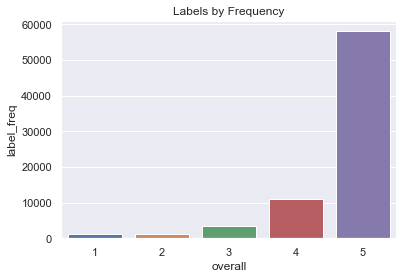

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

label_freq_plot = pd.DataFrame({'label_freq' : y_train.value_counts()}).reset_index().sort_values(by='overall',ascending=True)

sns.barplot(x=label_freq_plot['overall'],y=label_freq_plot['label_freq']).set_title('Labels by Frequency')

plt.show()

## Resampling


Attempt to fix the imbalance in the labels by oversampling the samples with labels that appear less frequently to have the same frequency as the most frequent label.

In [8]:
# optional "manual" resampler with sklearn.utils.resample

# from sklearn.utils import resample

# xy_train = pd.concat([x_train,y_train], axis=1)
# xy_val_train = pd.concat([x_val_train,y_val_train], axis=1)

# def resampling(minority):
#    resampled_minority = resample(minority, replace=True, n_samples= len(xy_train[xy_train.overall==5]), random_state=0)
#    return resampled_minority

# resampled_xy_train = xy_train[xy_train.overall==5]
# resampled_xy_val_train = xy_val_train[xy_val_train.overall==5]

# for i in range (1,5):
#    resampled_xy_train = pd.concat([resampled_xy_train,resampling(xy_train[xy_train.overall==i])])

# for i in range (1,5):
#    resampled_xy_val_train = pd.concat([resampled_xy_val_train,resampling(xy_val_train[xy_val_train.overall==i])])

# resampled_shuffled_xy_train = resampled_xy_train.sample(frac=1)
# x_train = resampled_shuffled_xy_train['processed_reviews'].to_frame()
# y_train = resampled_shuffled_xy_train['overall'].to_frame()

# resampled_shuffled_xy_val_train = resampled_xy_val_train.sample(frac=1)
# x_val_train = resampled_shuffled_xy_val_train['processed_reviews'].to_frame()
# y_val_train = resampled_shuffled_xy_val_train['overall'].to_frame()

In [9]:
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler

x_train, y_train = RandomOverSampler(random_state=0).fit_resample(x_train,y_train)

x_val_train, y_val_train = RandomOverSampler(random_state=0).fit_resample(x_val_train,y_val_train)



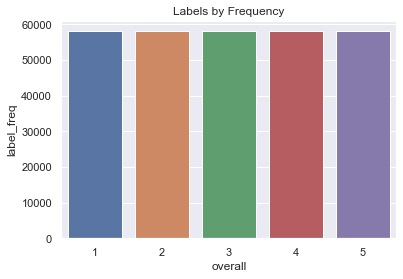

In [10]:
label_freq_plot = pd.DataFrame({'label_freq' : y_train.value_counts()}).reset_index().sort_values(by='overall',ascending=True)

sns.barplot(x=label_freq_plot['overall'],y=label_freq_plot['label_freq']).set_title('Labels by Frequency')

plt.show()

## Feature Extraction

Turning the processed data from samples into features that can be interpreted by a model.

## Tf-Idf Vectorization

TF-IDF, short for Term Frequency-Inverse Document Frequency, vectorizes any given set of features/terms (a sentence) by dividing the proportion of times a feature (a word after preprocessing) appears in the given set of features (**Term Frequency**) by the proportion of times that feature/ appears in all sets of features (**Inverse Document Frequency**). This can be understood as the former scaling the frequency of each feature to be within the range [0,1], and the latter reducing the scale of feature(s) that are common amongst all samples as it is indication that the feature(s) appearing frequently in a given set of features is in part due to the feature(s) simply being a generally common one.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

def dummy_token_and_pre(doc):
    return doc

tfidf = TfidfVectorizer(analyzer='word', tokenizer=dummy_token_and_pre, preprocessor=dummy_token_and_pre, token_pattern=None)

tfidf_val = TfidfVectorizer(analyzer='word', tokenizer=dummy_token_and_pre, preprocessor=dummy_token_and_pre, token_pattern=None)

x_trainvec = tfidf.fit_transform(x_train.processed_reviews).sorted_indices()
x_testvec = tfidf.transform(x_test.processed_reviews).sorted_indices()

x_val_trainvec = tfidf_val.fit_transform(x_val_train.processed_reviews).sorted_indices()
x_val_testvec = tfidf_val.transform(x_val_test.processed_reviews).sorted_indices()

## Models

### TF MLP

A Tensorflow Multilayer-Perceptron with Stochastic Gradient Descent as an optimizer and categorical cross entropy as a loss function ran without any advanced techniques. Hyperparameter tuned with Optuna using Tree Parzen Estimators + a modified version of Asynchronous Successive Halving (that was ran synchronously) with the validaiton macro F1-score as the valuation metric. The validation set was used instead of cross-validation for cross-library compatability issues.

In [12]:
#pseudocode for mlp hyperparam tuning

#obj()
    #param = suggest()

    #model = model()

    #for epochs in range()
    #            agg_f1 = []

    #    for train_index, val_index in StratifiedKFold(n_splits=5).split(x_trainvec,y_train): 

    #        x_trainvec_resd, y_train_resd = RandomOverSampler(random_state=0).fit_resample(x_trainvec.iloc[train_index], y_train.iloc[train_index])    

    #        model.fit(x=x_trainvec_resd, y=y_train_resd, epochs =(5^(rung)), verbose=0, batch_size= 100, random_state=0, callbacks=es)

    #        agg_f1.append(f1_score(y_pred=model.predict(pd.DataFrame.sparse.from_spmatrix(x_trainvec).iloc[val_index]), y_true=y_train.iloc[val_index].to_numpy().ravel(), average = 'macro'))

    #    intermediate_value = statistics.mean(agg_f1)



#rant: The challenge in implementing cross-validation for a tf model is the use of a tf model with (a lack of)sklearn functionalities
#      In this case, tf models have some hyperparams that need do be defined in .fit(), which clashes with sklearn functionalities 
#      as some sklearn functions have .fit() implicit in them. The important one here is cross_val_score(). Without this, one has to
#      resort to manually implementing the (stratified)cross_val function. This is a further issue when the data is imbalanced.
#      From googling it seems that the way to treat imbalanced data in cross-validation is to oversample the training folds
#      for each cross-validation split. This can normally be combined into a sklearn/imblearn pipeline and then passed to the
#      cross-validation function as seen in the random forest model. However, as mentioned this is a tf model with sklearn functionalities,
#      hence one has to implement this part manually as well. This is a bigger conundrum that one might initially expect.
#      As the method used is usually to slice out the training part of each cross-validation fold and then apply an oversampling function.
#      However, slicing a sparse matrix with a 1d np array as input is something that googling doesnt show how to do.
#      Now, you might think of transforming the sparse matrix into a pd df so that you could slice it with say iloc, but  
#      because of an unknown reason while the oversampling function as mentioned previously is supposed to be able to take 
#      both pandas df and sparse matrix as inputs, the pandas df version of a sparse matrix is not a valid input. This is vile shenanigans 
#      and I am utterly repulsed by it. Yet, given all this there is still the option of moving the tf-idf vectorization into the 
#      cross-validation part so that the sparse matrix is only made post oversampling, or making your own cross-validation
#      function with libraries using an updated version of pandas/scipy(both of which I will NOT do).
#  

#      Now one might be wondering why one should use a tf model anyways given its imperfect compatabiities(at least in cross-validation).  
#      The answer is GPU. Sklearn does not offer GPU support for training its models. The increase in training speed given GPU support is  
#      highly considerable, especially if you can parellelize your processes. However, given that cross-validation is such a pain to implement, 
#      one might ask whether its still worth using even  if you have to redo the tf-idf vectorization every split for every epoch 
#      for every set of hyperparameters. The answer is something I do not know and will not attempt to know. Hence, the question is then
#      rephrased into whether the extra speed from using the GPU is worth the decrease in samples used for the training set as some samples need
#      to be separated into a validation set. Admittedly, I personally answered this question rather arbitrarily and perhaps personally biased to the
#      supposed superiority of Optuna in flexibility and (maybe)speed over sklearn hyperparameter tuning.
#      Hence, I can't exactly justify my choice here, and what I do here is best treated just as a proof of concept from a tired individual.
            


In [13]:
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizer_v2.gradient_descent import SGD
from scikeras.wrappers import KerasClassifier
from imblearn.over_sampling import RandomOverSampler
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import SuccessiveHalvingPruner
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from tensorflow_addons.metrics import F1Score
from keras.utils import to_categorical
import scipy



def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)

tf_x_val_trainvec = convert_sparse_matrix_to_sparse_tensor(x_val_trainvec)

tf_x_val_testvec = convert_sparse_matrix_to_sparse_tensor(x_val_testvec)

tf_x_trainvec = convert_sparse_matrix_to_sparse_tensor(x_trainvec)

def create_model(trial, X):
    lr = trial.suggest_uniform('lr', 0.00001, 0.1)
    units = trial.suggest_int('units', 10, 50)
    input_dim = X

    model = Sequential()
    model.add(Dense(units, input_dim=input_dim, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dense(5, activation='softmax'))

    optimizer = SGD(learning_rate=lr, momentum=0.9)

    

    model.compile(loss='categorical_crossentropy', 
                    optimizer=optimizer, 
                    metrics=['accuracy', F1Score(num_classes=5, average= 'macro', name='tf_f1')])
    return model
            

def objective_mlp(trial):

    model = create_model(trial, x_val_trainvec.shape[1])

    callbacks = [EarlyStopping(monitor='val_tf_f1', mode='max', min_delta=0.01, patience=3, verbose=1), TFKerasPruningCallback(trial,'val_tf_f1')]

    fit_model = model.fit(x=tf_x_val_trainvec, y=to_categorical(y_val_train.sub(1)), epochs =50, verbose=1, batch_size= 50, callbacks=callbacks, validation_data=(tf_x_val_testvec,to_categorical(y_val_test.sub(1))))

    return fit_model.history['val_tf_f1'][-1]

def show_result(study):

    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

    trial_idx = 0
    for frozen_trial in study.get_trials(deepcopy=False):

        print("Trial {} completed rungs: {}".format(trial_idx, frozen_trial.system_attrs))
        trial_idx +=1

    print("Study statistics: ")
    print("  Number of finished trials: ", len(study.trials))
    print("  Number of pruned trials: ", len(pruned_trials))
    print("  Number of complete trials: ", len(complete_trials))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

study = optuna.create_study(
    direction="maximize",sampler= TPESampler(),  pruner=SuccessiveHalvingPruner()
)
study.optimize(objective_mlp, n_trials=100)

show_result(study)



[I 2022-09-08 05:35:07,421] A new study created in memory with name: no-name-ed472055-0804-4bb8-8544-fb1aadaeba72


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 19), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 25s 5ms/step - loss: 0.7848 - accuracy: 0.6788 - tf_f1: 0.5525 - val_loss: 0.8993 - val_accuracy: 0.6737 - val_tf_f1: 0.6758
Epoch 2/50
4646/4646 [==============================] - 23s 5ms/step - loss: 0.4584 - accuracy: 0.8141 - tf_f1: 0.7161 - val_loss: 1.1703 - val_accuracy: 0.5047 - val_tf_f1: 0.7420
Epoch 3/50
4646/4646 [==============================] - 23s 5ms/step - loss: 0.3776 - accuracy: 0.8476 - tf_f1: 0.7590 - val_loss: 1.1661 - val_accuracy: 0.6204 - val_tf_f1: 0.7739
Epoch 4/50
4646/4646 [==============================] - 23s 5ms/step - loss: 0.3376 - accuracy: 0.8650 - tf_f1: 0.7849 - val_loss: 1.0628 - val_accuracy: 0.6633 - val_tf_f1: 0.7947
Epoch 5/50
4646/4646 [==============================] - 23s 5ms/step - loss: 0.3094 - accuracy: 0.8765 - tf_f1: 0.8027 - val_loss: 1.1421 - val_accuracy: 0.6543 - val_tf_f1: 0.8096
Epoch 6/50
4646/4646 [==============================] - 23s 5ms/step - loss: 0.2876 - accuracy: 0.8873 - t

[I 2022-09-08 05:41:30,762] Trial 0 finished with value: 0.872645914554596 and parameters: {'lr': 0.07628637628525947, 'units': 19}. Best is trial 0 with value: 0.872645914554596.


Epoch 00016: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Reshape:0", shape=(None, 46), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 24s 5ms/step - loss: 0.9989 - accuracy: 0.6035 - tf_f1: 0.4671 - val_loss: 1.0096 - val_accuracy: 0.5727 - val_tf_f1: 0.5957
Epoch 2/50
4646/4646 [==============================] - 24s 5ms/step - loss: 0.5519 - accuracy: 0.7858 - tf_f1: 0.6485 - val_loss: 1.0470 - val_accuracy: 0.5433 - val_tf_f1: 0.6868
Epoch 3/50
4646/4646 [==============================] - 24s 5ms/step - loss: 0.4223 - accuracy: 0.8355 - tf_f1: 0.7123 - val_loss: 0.8601 - val_accuracy: 0.6868 - val_tf_f1: 0.7342
Epoch 4/50
4646/4646 [==============================] - 24s 5ms/step - loss: 0.3518 - accuracy: 0.8627 - tf_f1: 0.7509 - val_loss: 1.0999 - val_accuracy: 0.5958 - val_tf_f1: 0.7645
Epoch 5/50
4646/4646 [==============================] - 29s 6ms/step - loss: 0.3034 - accuracy: 0.8817 - tf_f1: 0.7757 - val_loss: 0.9254 - val_accuracy: 0.6994 - val_tf_f1: 0.7863
Epoch 6/50
4646/4646 [==============================] - 24s 5ms/step - loss: 0.2684 - accuracy: 0.8969 - t

[I 2022-09-08 05:50:02,264] Trial 1 finished with value: 0.8910649418830872 and parameters: {'lr': 0.024353689348727035, 'units': 46}. Best is trial 1 with value: 0.8910649418830872.


Epoch 00020: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape:0", shape=(None, 34), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 25s 5ms/step - loss: 1.3378 - accuracy: 0.4788 - tf_f1: 0.3799 - val_loss: 1.1395 - val_accuracy: 0.5554 - val_tf_f1: 0.4720
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.9260 - accuracy: 0.6612 - tf_f1: 0.5215 - val_loss: 0.9352 - val_accuracy: 0.6359 - val_tf_f1: 0.5641


[I 2022-09-08 05:50:53,192] Trial 2 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_3/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_3/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 21), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_3/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 1.0992 - accuracy: 0.5632 - tf_f1: 0.4350 - val_loss: 0.9161 - val_accuracy: 0.6613 - val_tf_f1: 0.5598
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.6308 - accuracy: 0.7596 - tf_f1: 0.6170 - val_loss: 1.0151 - val_accuracy: 0.5809 - val_tf_f1: 0.6573


[I 2022-09-08 05:51:44,101] Trial 3 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_4/dense_8/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_4/dense_8/embedding_lookup_sparse/Reshape:0", shape=(None, 17), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_4/dense_8/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 25s 5ms/step - loss: 0.8968 - accuracy: 0.6427 - tf_f1: 0.5065 - val_loss: 1.0516 - val_accuracy: 0.5433 - val_tf_f1: 0.6352
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.5278 - accuracy: 0.7916 - tf_f1: 0.6788 - val_loss: 0.9906 - val_accuracy: 0.5934 - val_tf_f1: 0.7101
Epoch 3/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4417 - accuracy: 0.8261 - tf_f1: 0.7303 - val_loss: 1.0164 - val_accuracy: 0.6449 - val_tf_f1: 0.7468
Epoch 4/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.3935 - accuracy: 0.8450 - tf_f1: 0.7590 - val_loss: 1.0172 - val_accuracy: 0.6336 - val_tf_f1: 0.7697
Epoch 5/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.3641 - accuracy: 0.8575 - tf_f1: 0.7784 - val_loss: 1.1039 - val_accuracy: 0.6026 - val_tf_f1: 0.7857


[I 2022-09-08 05:53:50,893] Trial 4 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_5/dense_10/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_5/dense_10/embedding_lookup_sparse/Reshape:0", shape=(None, 43), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_5/dense_10/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 1.0617 - accuracy: 0.5799 - tf_f1: 0.4487 - val_loss: 0.9942 - val_accuracy: 0.6190 - val_tf_f1: 0.5737
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.5971 - accuracy: 0.7711 - tf_f1: 0.6293 - val_loss: 0.9485 - val_accuracy: 0.6282 - val_tf_f1: 0.6701


[I 2022-09-08 05:54:42,354] Trial 5 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_6/dense_12/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_6/dense_12/embedding_lookup_sparse/Reshape:0", shape=(None, 46), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_6/dense_12/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8692 - accuracy: 0.6484 - tf_f1: 0.5137 - val_loss: 0.8847 - val_accuracy: 0.6458 - val_tf_f1: 0.6445
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4759 - accuracy: 0.8104 - tf_f1: 0.6921 - val_loss: 1.0184 - val_accuracy: 0.6289 - val_tf_f1: 0.7254
Epoch 3/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.3735 - accuracy: 0.8508 - tf_f1: 0.7472 - val_loss: 0.9471 - val_accuracy: 0.6807 - val_tf_f1: 0.7653
Epoch 4/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.3162 - accuracy: 0.8749 - tf_f1: 0.7794 - val_loss: 0.9994 - val_accuracy: 0.6731 - val_tf_f1: 0.7912
Epoch 5/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2755 - accuracy: 0.8927 - tf_f1: 0.8012 - val_loss: 1.2170 - val_accuracy: 0.5771 - val_tf_f1: 0.8094
Epoch 6/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2476 - accuracy: 0.9042 - t

[I 2022-09-08 06:02:42,867] Trial 6 finished with value: 0.8964519500732422 and parameters: {'lr': 0.04587025121029349, 'units': 46}. Best is trial 6 with value: 0.8964519500732422.


Epoch 00019: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_7/dense_14/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_7/dense_14/embedding_lookup_sparse/Reshape:0", shape=(None, 42), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_7/dense_14/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.9906 - accuracy: 0.6077 - tf_f1: 0.4713 - val_loss: 0.9383 - val_accuracy: 0.6397 - val_tf_f1: 0.6018
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.5498 - accuracy: 0.7850 - tf_f1: 0.6541 - val_loss: 1.0697 - val_accuracy: 0.5463 - val_tf_f1: 0.6906


[I 2022-09-08 06:03:34,592] Trial 7 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_8/dense_16/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_8/dense_16/embedding_lookup_sparse/Reshape:0", shape=(None, 41), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_8/dense_16/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7731 - accuracy: 0.6816 - tf_f1: 0.5587 - val_loss: 1.1003 - val_accuracy: 0.5792 - val_tf_f1: 0.6762
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4337 - accuracy: 0.8217 - tf_f1: 0.7160 - val_loss: 0.9913 - val_accuracy: 0.6469 - val_tf_f1: 0.7462
Epoch 3/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.3428 - accuracy: 0.8590 - tf_f1: 0.7660 - val_loss: 1.1710 - val_accuracy: 0.5895 - val_tf_f1: 0.7813
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2960 - accuracy: 0.8793 - tf_f1: 0.7931 - val_loss: 1.2580 - val_accuracy: 0.5711 - val_tf_f1: 0.8029
Epoch 5/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2668 - accuracy: 0.8928 - tf_f1: 0.8112 - val_loss: 1.1540 - val_accuracy: 0.6468 - val_tf_f1: 0.8187
Epoch 6/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2404 - accuracy: 0.9040 - t

[I 2022-09-08 06:10:47,729] Trial 8 pruned. Trial was pruned at epoch 16.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_9/dense_18/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_9/dense_18/embedding_lookup_sparse/Reshape:0", shape=(None, 22), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_9/dense_18/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 28s 6ms/step - loss: 0.9582 - accuracy: 0.6176 - tf_f1: 0.4833 - val_loss: 1.0833 - val_accuracy: 0.5270 - val_tf_f1: 0.6095
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.5455 - accuracy: 0.7853 - tf_f1: 0.6580 - val_loss: 0.9317 - val_accuracy: 0.6445 - val_tf_f1: 0.6944


[I 2022-09-08 06:11:41,155] Trial 9 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_10/dense_20/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_10/dense_20/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_10/dense_20/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8208 - accuracy: 0.6655 - tf_f1: 0.5323 - val_loss: 1.2565 - val_accuracy: 0.4415 - val_tf_f1: 0.6560
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4395 - accuracy: 0.8221 - tf_f1: 0.6999 - val_loss: 0.9712 - val_accuracy: 0.6506 - val_tf_f1: 0.7345
Epoch 3/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.3401 - accuracy: 0.8615 - tf_f1: 0.7568 - val_loss: 0.9806 - val_accuracy: 0.6802 - val_tf_f1: 0.7750
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2913 - accuracy: 0.8825 - tf_f1: 0.7887 - val_loss: 1.1931 - val_accuracy: 0.5982 - val_tf_f1: 0.7998
Epoch 5/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2596 - accuracy: 0.8967 - tf_f1: 0.8087 - val_loss: 1.2848 - val_accuracy: 0.5841 - val_tf_f1: 0.8166


[I 2022-09-08 06:13:49,066] Trial 10 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_11/dense_22/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_11/dense_22/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_11/dense_22/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8427 - accuracy: 0.6584 - tf_f1: 0.5281 - val_loss: 0.9613 - val_accuracy: 0.6304 - val_tf_f1: 0.6541
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4557 - accuracy: 0.8162 - tf_f1: 0.7001 - val_loss: 0.9203 - val_accuracy: 0.6831 - val_tf_f1: 0.7334


[I 2022-09-08 06:14:40,717] Trial 11 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_12/dense_24/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_12/dense_24/embedding_lookup_sparse/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_12/dense_24/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8940 - accuracy: 0.6409 - tf_f1: 0.5070 - val_loss: 1.1536 - val_accuracy: 0.5328 - val_tf_f1: 0.6337
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4868 - accuracy: 0.8064 - tf_f1: 0.6809 - val_loss: 0.9506 - val_accuracy: 0.6555 - val_tf_f1: 0.7167


[I 2022-09-08 06:15:32,123] Trial 12 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_13/dense_26/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_13/dense_26/embedding_lookup_sparse/Reshape:0", shape=(None, 37), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_13/dense_26/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7922 - accuracy: 0.6776 - tf_f1: 0.5479 - val_loss: 1.0231 - val_accuracy: 0.6057 - val_tf_f1: 0.6728
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4180 - accuracy: 0.8305 - tf_f1: 0.7172 - val_loss: 0.9111 - val_accuracy: 0.6929 - val_tf_f1: 0.7497
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3244 - accuracy: 0.8677 - tf_f1: 0.7709 - val_loss: 1.0448 - val_accuracy: 0.6310 - val_tf_f1: 0.7872
Epoch 4/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2772 - accuracy: 0.8890 - tf_f1: 0.7998 - val_loss: 1.0130 - val_accuracy: 0.6982 - val_tf_f1: 0.8110
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2467 - accuracy: 0.9025 - tf_f1: 0.8200 - val_loss: 1.0687 - val_accuracy: 0.6884 - val_tf_f1: 0.8278
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2208 - accuracy: 0.9142 - t

[I 2022-09-08 06:22:46,479] Trial 13 finished with value: 0.9004270434379578 and parameters: {'lr': 0.06864846281726084, 'units': 37}. Best is trial 13 with value: 0.9004270434379578.


Epoch 00017: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_14/dense_28/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_14/dense_28/embedding_lookup_sparse/Reshape:0", shape=(None, 37), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_14/dense_28/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8394 - accuracy: 0.6540 - tf_f1: 0.5198 - val_loss: 1.0469 - val_accuracy: 0.5766 - val_tf_f1: 0.6477
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4946 - accuracy: 0.7990 - tf_f1: 0.6901 - val_loss: 0.9747 - val_accuracy: 0.6463 - val_tf_f1: 0.7208


[I 2022-09-08 06:23:38,460] Trial 14 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_15/dense_30/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_15/dense_30/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_15/dense_30/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8248 - accuracy: 0.6616 - tf_f1: 0.5390 - val_loss: 1.1588 - val_accuracy: 0.5441 - val_tf_f1: 0.6558
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.5336 - accuracy: 0.7873 - tf_f1: 0.6917 - val_loss: 1.1615 - val_accuracy: 0.5379 - val_tf_f1: 0.7168


[I 2022-09-08 06:24:30,222] Trial 15 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_16/dense_32/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_16/dense_32/embedding_lookup_sparse/Reshape:0", shape=(None, 29), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_16/dense_32/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7913 - accuracy: 0.6756 - tf_f1: 0.5492 - val_loss: 1.2145 - val_accuracy: 0.4361 - val_tf_f1: 0.6668
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4450 - accuracy: 0.8196 - tf_f1: 0.7067 - val_loss: 1.0149 - val_accuracy: 0.6175 - val_tf_f1: 0.7384
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3507 - accuracy: 0.8567 - tf_f1: 0.7590 - val_loss: 1.1219 - val_accuracy: 0.5948 - val_tf_f1: 0.7751
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3076 - accuracy: 0.8744 - tf_f1: 0.7873 - val_loss: 1.3593 - val_accuracy: 0.5094 - val_tf_f1: 0.7968
Epoch 5/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2793 - accuracy: 0.8869 - tf_f1: 0.8048 - val_loss: 1.0375 - val_accuracy: 0.7068 - val_tf_f1: 0.8128


[I 2022-09-08 06:26:39,086] Trial 16 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_17/dense_34/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_17/dense_34/embedding_lookup_sparse/Reshape:0", shape=(None, 27), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_17/dense_34/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8545 - accuracy: 0.6478 - tf_f1: 0.5119 - val_loss: 1.1169 - val_accuracy: 0.5211 - val_tf_f1: 0.6419
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4779 - accuracy: 0.8061 - tf_f1: 0.6868 - val_loss: 0.9734 - val_accuracy: 0.6656 - val_tf_f1: 0.7209


[I 2022-09-08 06:27:30,458] Trial 17 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_18/dense_36/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_18/dense_36/embedding_lookup_sparse/Reshape:0", shape=(None, 36), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_18/dense_36/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8082 - accuracy: 0.6679 - tf_f1: 0.5413 - val_loss: 1.0178 - val_accuracy: 0.5988 - val_tf_f1: 0.6634
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4656 - accuracy: 0.8104 - tf_f1: 0.7052 - val_loss: 1.0524 - val_accuracy: 0.6211 - val_tf_f1: 0.7343


[I 2022-09-08 06:28:21,946] Trial 18 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_19/dense_38/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_19/dense_38/embedding_lookup_sparse/Reshape:0", shape=(None, 38), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_19/dense_38/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8745 - accuracy: 0.6487 - tf_f1: 0.5201 - val_loss: 0.9366 - val_accuracy: 0.6544 - val_tf_f1: 0.6438
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4758 - accuracy: 0.8104 - tf_f1: 0.6911 - val_loss: 0.8532 - val_accuracy: 0.7018 - val_tf_f1: 0.7261


[I 2022-09-08 06:29:13,929] Trial 19 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_20/dense_40/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_20/dense_40/embedding_lookup_sparse/Reshape:0", shape=(None, 45), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_20/dense_40/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7983 - accuracy: 0.6754 - tf_f1: 0.5490 - val_loss: 1.0618 - val_accuracy: 0.5872 - val_tf_f1: 0.6700
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4319 - accuracy: 0.8235 - tf_f1: 0.7122 - val_loss: 1.0285 - val_accuracy: 0.6286 - val_tf_f1: 0.7436
Epoch 3/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.3347 - accuracy: 0.8625 - tf_f1: 0.7641 - val_loss: 1.0855 - val_accuracy: 0.6174 - val_tf_f1: 0.7807
Epoch 4/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2848 - accuracy: 0.8830 - tf_f1: 0.7933 - val_loss: 1.0229 - val_accuracy: 0.6702 - val_tf_f1: 0.8043
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2528 - accuracy: 0.8977 - tf_f1: 0.8133 - val_loss: 1.1845 - val_accuracy: 0.6168 - val_tf_f1: 0.8211
Epoch 6/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2274 - accuracy: 0.9097 - t

[I 2022-09-08 06:36:30,999] Trial 20 pruned. Trial was pruned at epoch 16.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_21/dense_42/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_21/dense_42/embedding_lookup_sparse/Reshape:0", shape=(None, 47), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_21/dense_42/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 1.5539 - accuracy: 0.4018 - tf_f1: 0.3171 - val_loss: 1.3550 - val_accuracy: 0.6336 - val_tf_f1: 0.3853
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 1.3554 - accuracy: 0.4853 - tf_f1: 0.4068 - val_loss: 1.1741 - val_accuracy: 0.6038 - val_tf_f1: 0.4266


[I 2022-09-08 06:37:22,758] Trial 21 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_22/dense_44/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_22/dense_44/embedding_lookup_sparse/Reshape:0", shape=(None, 40), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_22/dense_44/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8589 - accuracy: 0.6531 - tf_f1: 0.5200 - val_loss: 0.9179 - val_accuracy: 0.6492 - val_tf_f1: 0.6491
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4679 - accuracy: 0.8123 - tf_f1: 0.6958 - val_loss: 1.0607 - val_accuracy: 0.6328 - val_tf_f1: 0.7286


[I 2022-09-08 06:38:14,236] Trial 22 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_23/dense_46/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_23/dense_46/embedding_lookup_sparse/Reshape:0", shape=(None, 46), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_23/dense_46/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.9312 - accuracy: 0.6271 - tf_f1: 0.4900 - val_loss: 1.1572 - val_accuracy: 0.5314 - val_tf_f1: 0.6190
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.5079 - accuracy: 0.7990 - tf_f1: 0.6683 - val_loss: 1.1866 - val_accuracy: 0.5561 - val_tf_f1: 0.7044


[I 2022-09-08 06:39:06,078] Trial 23 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_24/dense_48/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_24/dense_48/embedding_lookup_sparse/Reshape:0", shape=(None, 48), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_24/dense_48/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 27s 6ms/step - loss: 1.1593 - accuracy: 0.5469 - tf_f1: 0.4228 - val_loss: 1.0245 - val_accuracy: 0.5648 - val_tf_f1: 0.5353
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.6993 - accuracy: 0.7392 - tf_f1: 0.5913 - val_loss: 0.9150 - val_accuracy: 0.6369 - val_tf_f1: 0.6347


[I 2022-09-08 06:39:58,805] Trial 24 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_25/dense_50/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_25/dense_50/embedding_lookup_sparse/Reshape:0", shape=(None, 44), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_25/dense_50/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8421 - accuracy: 0.6587 - tf_f1: 0.5244 - val_loss: 0.9168 - val_accuracy: 0.6529 - val_tf_f1: 0.6541
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4538 - accuracy: 0.8176 - tf_f1: 0.7005 - val_loss: 1.0346 - val_accuracy: 0.6203 - val_tf_f1: 0.7336


[I 2022-09-08 06:40:50,873] Trial 25 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_26/dense_52/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_26/dense_52/embedding_lookup_sparse/Reshape:0", shape=(None, 39), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_26/dense_52/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8060 - accuracy: 0.6699 - tf_f1: 0.5405 - val_loss: 1.1135 - val_accuracy: 0.5293 - val_tf_f1: 0.6640
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4471 - accuracy: 0.8188 - tf_f1: 0.7064 - val_loss: 1.0378 - val_accuracy: 0.6045 - val_tf_f1: 0.7375
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3621 - accuracy: 0.8529 - tf_f1: 0.7575 - val_loss: 1.3430 - val_accuracy: 0.4720 - val_tf_f1: 0.7721
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3117 - accuracy: 0.8735 - tf_f1: 0.7834 - val_loss: 1.1998 - val_accuracy: 0.6130 - val_tf_f1: 0.7941
Epoch 5/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2813 - accuracy: 0.8882 - tf_f1: 0.8029 - val_loss: 1.1081 - val_accuracy: 0.6738 - val_tf_f1: 0.8110


[I 2022-09-08 06:42:59,119] Trial 26 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_27/dense_54/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_27/dense_54/embedding_lookup_sparse/Reshape:0", shape=(None, 34), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_27/dense_54/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8020 - accuracy: 0.6700 - tf_f1: 0.5442 - val_loss: 1.0832 - val_accuracy: 0.5513 - val_tf_f1: 0.6642
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4659 - accuracy: 0.8097 - tf_f1: 0.7037 - val_loss: 0.9742 - val_accuracy: 0.6403 - val_tf_f1: 0.7339


[I 2022-09-08 06:43:50,982] Trial 27 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_28/dense_56/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_28/dense_56/embedding_lookup_sparse/Reshape:0", shape=(None, 43), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_28/dense_56/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8357 - accuracy: 0.6592 - tf_f1: 0.5301 - val_loss: 0.9948 - val_accuracy: 0.5958 - val_tf_f1: 0.6552
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4467 - accuracy: 0.8200 - tf_f1: 0.7014 - val_loss: 0.9782 - val_accuracy: 0.6487 - val_tf_f1: 0.7351
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3473 - accuracy: 0.8595 - tf_f1: 0.7570 - val_loss: 1.0389 - val_accuracy: 0.6557 - val_tf_f1: 0.7745
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2952 - accuracy: 0.8813 - tf_f1: 0.7879 - val_loss: 1.1777 - val_accuracy: 0.5888 - val_tf_f1: 0.7988
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2624 - accuracy: 0.8964 - tf_f1: 0.8079 - val_loss: 1.1037 - val_accuracy: 0.6482 - val_tf_f1: 0.8162


[I 2022-09-08 06:45:59,731] Trial 28 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_29/dense_58/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_29/dense_58/embedding_lookup_sparse/Reshape:0", shape=(None, 29), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_29/dense_58/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.9266 - accuracy: 0.6310 - tf_f1: 0.4980 - val_loss: 1.0314 - val_accuracy: 0.5543 - val_tf_f1: 0.6248
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.5164 - accuracy: 0.7960 - tf_f1: 0.6723 - val_loss: 0.9504 - val_accuracy: 0.6238 - val_tf_f1: 0.7073


[I 2022-09-08 06:46:52,228] Trial 29 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_30/dense_60/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_30/dense_60/embedding_lookup_sparse/Reshape:0", shape=(None, 26), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_30/dense_60/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 1.0306 - accuracy: 0.5914 - tf_f1: 0.4551 - val_loss: 0.9207 - val_accuracy: 0.6265 - val_tf_f1: 0.5856
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.5753 - accuracy: 0.7787 - tf_f1: 0.6408 - val_loss: 1.0081 - val_accuracy: 0.5986 - val_tf_f1: 0.6796


[I 2022-09-08 06:47:44,664] Trial 30 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_31/dense_62/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_31/dense_62/embedding_lookup_sparse/Reshape:0", shape=(None, 11), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_31/dense_62/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 27s 6ms/step - loss: 0.8618 - accuracy: 0.6487 - tf_f1: 0.5170 - val_loss: 1.1589 - val_accuracy: 0.5532 - val_tf_f1: 0.6413
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.5750 - accuracy: 0.7765 - tf_f1: 0.6782 - val_loss: 1.1848 - val_accuracy: 0.4996 - val_tf_f1: 0.7035


[I 2022-09-08 06:48:37,294] Trial 31 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_32/dense_64/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_32/dense_64/embedding_lookup_sparse/Reshape:0", shape=(None, 17), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_32/dense_64/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 1.2079 - accuracy: 0.5265 - tf_f1: 0.4171 - val_loss: 1.0440 - val_accuracy: 0.5633 - val_tf_f1: 0.5174
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.7523 - accuracy: 0.7202 - tf_f1: 0.5729 - val_loss: 0.8160 - val_accuracy: 0.6851 - val_tf_f1: 0.6171


[I 2022-09-08 06:49:29,782] Trial 32 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_33/dense_66/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_33/dense_66/embedding_lookup_sparse/Reshape:0", shape=(None, 15), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_33/dense_66/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8507 - accuracy: 0.6523 - tf_f1: 0.5287 - val_loss: 1.0312 - val_accuracy: 0.5488 - val_tf_f1: 0.6480
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.5766 - accuracy: 0.7742 - tf_f1: 0.6832 - val_loss: 0.8570 - val_accuracy: 0.6871 - val_tf_f1: 0.7099


[I 2022-09-08 06:50:22,054] Trial 33 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_34/dense_68/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_34/dense_68/embedding_lookup_sparse/Reshape:0", shape=(None, 23), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_34/dense_68/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 27s 5ms/step - loss: 0.7868 - accuracy: 0.6763 - tf_f1: 0.5462 - val_loss: 1.0132 - val_accuracy: 0.6386 - val_tf_f1: 0.6728
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4395 - accuracy: 0.8206 - tf_f1: 0.7151 - val_loss: 1.1506 - val_accuracy: 0.5638 - val_tf_f1: 0.7434
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3584 - accuracy: 0.8528 - tf_f1: 0.7617 - val_loss: 1.1789 - val_accuracy: 0.5908 - val_tf_f1: 0.7766
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3150 - accuracy: 0.8714 - tf_f1: 0.7881 - val_loss: 1.2127 - val_accuracy: 0.5909 - val_tf_f1: 0.7977
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2867 - accuracy: 0.8834 - tf_f1: 0.8057 - val_loss: 1.1244 - val_accuracy: 0.6712 - val_tf_f1: 0.8130


[I 2022-09-08 06:52:32,924] Trial 34 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_35/dense_70/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_35/dense_70/embedding_lookup_sparse/Reshape:0", shape=(None, 35), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_35/dense_70/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8274 - accuracy: 0.6605 - tf_f1: 0.5273 - val_loss: 0.9086 - val_accuracy: 0.6698 - val_tf_f1: 0.6575
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4733 - accuracy: 0.8074 - tf_f1: 0.7008 - val_loss: 0.9748 - val_accuracy: 0.6435 - val_tf_f1: 0.7312


[I 2022-09-08 06:53:25,401] Trial 35 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_36/dense_72/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_36/dense_72/embedding_lookup_sparse/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_36/dense_72/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8675 - accuracy: 0.6507 - tf_f1: 0.5188 - val_loss: 0.8945 - val_accuracy: 0.6713 - val_tf_f1: 0.6471
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4872 - accuracy: 0.8052 - tf_f1: 0.6930 - val_loss: 0.9189 - val_accuracy: 0.6639 - val_tf_f1: 0.7251


[I 2022-09-08 06:54:17,785] Trial 36 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_37/dense_74/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_37/dense_74/embedding_lookup_sparse/Reshape:0", shape=(None, 41), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_37/dense_74/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8001 - accuracy: 0.6725 - tf_f1: 0.5421 - val_loss: 0.9242 - val_accuracy: 0.6437 - val_tf_f1: 0.6693
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4347 - accuracy: 0.8234 - tf_f1: 0.7136 - val_loss: 0.9271 - val_accuracy: 0.6921 - val_tf_f1: 0.7451
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3430 - accuracy: 0.8594 - tf_f1: 0.7656 - val_loss: 1.0041 - val_accuracy: 0.6799 - val_tf_f1: 0.7819
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2956 - accuracy: 0.8784 - tf_f1: 0.7941 - val_loss: 1.1056 - val_accuracy: 0.6427 - val_tf_f1: 0.8042
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2653 - accuracy: 0.8927 - tf_f1: 0.8127 - val_loss: 1.0350 - val_accuracy: 0.7085 - val_tf_f1: 0.8204
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2405 - accuracy: 0.9046 - t

[I 2022-09-08 07:01:35,873] Trial 37 pruned. Trial was pruned at epoch 16.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_38/dense_76/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_38/dense_76/embedding_lookup_sparse/Reshape:0", shape=(None, 20), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_38/dense_76/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.9884 - accuracy: 0.6053 - tf_f1: 0.4731 - val_loss: 1.0073 - val_accuracy: 0.5796 - val_tf_f1: 0.5993
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.5561 - accuracy: 0.7823 - tf_f1: 0.6507 - val_loss: 1.0119 - val_accuracy: 0.6042 - val_tf_f1: 0.6879


[I 2022-09-08 07:02:28,095] Trial 38 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_39/dense_78/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_39/dense_78/embedding_lookup_sparse/Reshape:0", shape=(None, 48), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_39/dense_78/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8356 - accuracy: 0.6597 - tf_f1: 0.5203 - val_loss: 0.9861 - val_accuracy: 0.6166 - val_tf_f1: 0.6551
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4410 - accuracy: 0.8231 - tf_f1: 0.7026 - val_loss: 0.9256 - val_accuracy: 0.6774 - val_tf_f1: 0.7374
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3379 - accuracy: 0.8634 - tf_f1: 0.7598 - val_loss: 0.9741 - val_accuracy: 0.6775 - val_tf_f1: 0.7779
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2862 - accuracy: 0.8851 - tf_f1: 0.7916 - val_loss: 1.0227 - val_accuracy: 0.6686 - val_tf_f1: 0.8030
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2525 - accuracy: 0.9001 - tf_f1: 0.8125 - val_loss: 1.0082 - val_accuracy: 0.7096 - val_tf_f1: 0.8210
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2265 - accuracy: 0.9116 - t

[I 2022-09-08 07:09:52,673] Trial 39 pruned. Trial was pruned at epoch 16.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_40/dense_80/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_40/dense_80/embedding_lookup_sparse/Reshape:0", shape=(None, 13), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_40/dense_80/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.9804 - accuracy: 0.6026 - tf_f1: 0.4642 - val_loss: 0.9260 - val_accuracy: 0.6160 - val_tf_f1: 0.5980
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.5933 - accuracy: 0.7707 - tf_f1: 0.6481 - val_loss: 1.1013 - val_accuracy: 0.5728 - val_tf_f1: 0.6822


[I 2022-09-08 07:10:45,139] Trial 40 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_41/dense_82/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_41/dense_82/embedding_lookup_sparse/Reshape:0", shape=(None, 48), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_41/dense_82/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 6ms/step - loss: 0.8284 - accuracy: 0.6647 - tf_f1: 0.5350 - val_loss: 0.9178 - val_accuracy: 0.6637 - val_tf_f1: 0.6605
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4445 - accuracy: 0.8213 - tf_f1: 0.7063 - val_loss: 1.2274 - val_accuracy: 0.4889 - val_tf_f1: 0.7372
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3391 - accuracy: 0.8634 - tf_f1: 0.7576 - val_loss: 1.0808 - val_accuracy: 0.6011 - val_tf_f1: 0.7754
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2827 - accuracy: 0.8866 - tf_f1: 0.7890 - val_loss: 1.1894 - val_accuracy: 0.5579 - val_tf_f1: 0.8003
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2484 - accuracy: 0.9028 - tf_f1: 0.8097 - val_loss: 1.0539 - val_accuracy: 0.6771 - val_tf_f1: 0.8185


[I 2022-09-08 07:12:54,665] Trial 41 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_42/dense_84/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_42/dense_84/embedding_lookup_sparse/Reshape:0", shape=(None, 49), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_42/dense_84/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8098 - accuracy: 0.6684 - tf_f1: 0.5303 - val_loss: 0.9647 - val_accuracy: 0.6350 - val_tf_f1: 0.6641
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4304 - accuracy: 0.8251 - tf_f1: 0.7099 - val_loss: 0.9706 - val_accuracy: 0.6722 - val_tf_f1: 0.7427
Epoch 3/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.3326 - accuracy: 0.8649 - tf_f1: 0.7642 - val_loss: 1.1398 - val_accuracy: 0.5816 - val_tf_f1: 0.7809
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2824 - accuracy: 0.8870 - tf_f1: 0.7937 - val_loss: 1.0068 - val_accuracy: 0.6882 - val_tf_f1: 0.8053
Epoch 5/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2458 - accuracy: 0.9043 - tf_f1: 0.8151 - val_loss: 1.1383 - val_accuracy: 0.6493 - val_tf_f1: 0.8233
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2181 - accuracy: 0.9165 - t

[I 2022-09-08 07:20:10,931] Trial 42 finished with value: 0.8994843363761902 and parameters: {'lr': 0.06154669343269398, 'units': 49}. Best is trial 13 with value: 0.9004270434379578.


Epoch 00017: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_43/dense_86/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_43/dense_86/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_43/dense_86/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7920 - accuracy: 0.6757 - tf_f1: 0.5437 - val_loss: 1.4542 - val_accuracy: 0.4489 - val_tf_f1: 0.6670
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4277 - accuracy: 0.8258 - tf_f1: 0.7083 - val_loss: 1.0701 - val_accuracy: 0.5978 - val_tf_f1: 0.7406
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3303 - accuracy: 0.8644 - tf_f1: 0.7620 - val_loss: 1.0064 - val_accuracy: 0.6791 - val_tf_f1: 0.7796
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2868 - accuracy: 0.8838 - tf_f1: 0.7929 - val_loss: 1.2234 - val_accuracy: 0.6034 - val_tf_f1: 0.8035
Epoch 5/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2553 - accuracy: 0.8984 - tf_f1: 0.8124 - val_loss: 1.1675 - val_accuracy: 0.6379 - val_tf_f1: 0.8203


[I 2022-09-08 07:22:19,584] Trial 43 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_44/dense_88/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_44/dense_88/embedding_lookup_sparse/Reshape:0", shape=(None, 43), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_44/dense_88/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8243 - accuracy: 0.6631 - tf_f1: 0.5311 - val_loss: 1.0723 - val_accuracy: 0.5901 - val_tf_f1: 0.6583
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4436 - accuracy: 0.8208 - tf_f1: 0.7036 - val_loss: 1.0121 - val_accuracy: 0.6182 - val_tf_f1: 0.7364


[I 2022-09-08 07:23:11,637] Trial 44 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_45/dense_90/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_45/dense_90/embedding_lookup_sparse/Reshape:0", shape=(None, 46), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_45/dense_90/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8165 - accuracy: 0.6666 - tf_f1: 0.5347 - val_loss: 1.0138 - val_accuracy: 0.6381 - val_tf_f1: 0.6626
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4411 - accuracy: 0.8223 - tf_f1: 0.7075 - val_loss: 1.0694 - val_accuracy: 0.5874 - val_tf_f1: 0.7394
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3392 - accuracy: 0.8632 - tf_f1: 0.7605 - val_loss: 1.1328 - val_accuracy: 0.5975 - val_tf_f1: 0.7776
Epoch 4/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2877 - accuracy: 0.8855 - tf_f1: 0.7907 - val_loss: 1.1305 - val_accuracy: 0.6395 - val_tf_f1: 0.8022
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2541 - accuracy: 0.9003 - tf_f1: 0.8116 - val_loss: 1.2499 - val_accuracy: 0.5941 - val_tf_f1: 0.8195


[I 2022-09-08 07:25:20,234] Trial 45 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_46/dense_92/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_46/dense_92/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_46/dense_92/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7765 - accuracy: 0.6804 - tf_f1: 0.5506 - val_loss: 1.0602 - val_accuracy: 0.5939 - val_tf_f1: 0.6758
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4141 - accuracy: 0.8295 - tf_f1: 0.7184 - val_loss: 0.9598 - val_accuracy: 0.6737 - val_tf_f1: 0.7503
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3196 - accuracy: 0.8682 - tf_f1: 0.7713 - val_loss: 0.9716 - val_accuracy: 0.7030 - val_tf_f1: 0.7882
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2730 - accuracy: 0.8891 - tf_f1: 0.8013 - val_loss: 1.1419 - val_accuracy: 0.6264 - val_tf_f1: 0.8116
Epoch 5/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2388 - accuracy: 0.9045 - tf_f1: 0.8203 - val_loss: 1.1056 - val_accuracy: 0.6714 - val_tf_f1: 0.8282
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2149 - accuracy: 0.9164 - t

[I 2022-09-08 07:32:35,962] Trial 46 finished with value: 0.9024535417556763 and parameters: {'lr': 0.08331671475847134, 'units': 50}. Best is trial 46 with value: 0.9024535417556763.


Epoch 00017: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_47/dense_94/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_47/dense_94/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_47/dense_94/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7743 - accuracy: 0.6814 - tf_f1: 0.5511 - val_loss: 1.0491 - val_accuracy: 0.5896 - val_tf_f1: 0.6770
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4138 - accuracy: 0.8303 - tf_f1: 0.7194 - val_loss: 0.8633 - val_accuracy: 0.7184 - val_tf_f1: 0.7520
Epoch 3/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.3197 - accuracy: 0.8692 - tf_f1: 0.7734 - val_loss: 1.0180 - val_accuracy: 0.6657 - val_tf_f1: 0.7897
Epoch 4/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2713 - accuracy: 0.8902 - tf_f1: 0.8023 - val_loss: 1.0949 - val_accuracy: 0.6667 - val_tf_f1: 0.8129
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2398 - accuracy: 0.9047 - tf_f1: 0.8218 - val_loss: 1.1554 - val_accuracy: 0.6254 - val_tf_f1: 0.8292
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2127 - accuracy: 0.9174 - t

[I 2022-09-08 07:39:51,714] Trial 47 finished with value: 0.9026344418525696 and parameters: {'lr': 0.08323038100711815, 'units': 50}. Best is trial 47 with value: 0.9026344418525696.


Epoch 00017: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_48/dense_96/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_48/dense_96/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_48/dense_96/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7829 - accuracy: 0.6767 - tf_f1: 0.5469 - val_loss: 0.9196 - val_accuracy: 0.6565 - val_tf_f1: 0.6740
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4319 - accuracy: 0.8228 - tf_f1: 0.7170 - val_loss: 1.1622 - val_accuracy: 0.5333 - val_tf_f1: 0.7454
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3451 - accuracy: 0.8580 - tf_f1: 0.7640 - val_loss: 1.1140 - val_accuracy: 0.6044 - val_tf_f1: 0.7797
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2975 - accuracy: 0.8779 - tf_f1: 0.7917 - val_loss: 1.1717 - val_accuracy: 0.6407 - val_tf_f1: 0.8020
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2663 - accuracy: 0.8920 - tf_f1: 0.8107 - val_loss: 1.3337 - val_accuracy: 0.5683 - val_tf_f1: 0.8178


[I 2022-09-08 07:42:00,241] Trial 48 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_49/dense_98/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_49/dense_98/embedding_lookup_sparse/Reshape:0", shape=(None, 45), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_49/dense_98/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7677 - accuracy: 0.6833 - tf_f1: 0.5571 - val_loss: 1.2191 - val_accuracy: 0.5236 - val_tf_f1: 0.6762
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4148 - accuracy: 0.8292 - tf_f1: 0.7176 - val_loss: 1.0129 - val_accuracy: 0.6403 - val_tf_f1: 0.7488
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3344 - accuracy: 0.8609 - tf_f1: 0.7687 - val_loss: 1.0950 - val_accuracy: 0.6366 - val_tf_f1: 0.7840
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2914 - accuracy: 0.8806 - tf_f1: 0.7961 - val_loss: 1.0827 - val_accuracy: 0.6753 - val_tf_f1: 0.8063
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2606 - accuracy: 0.8950 - tf_f1: 0.8151 - val_loss: 1.1815 - val_accuracy: 0.6195 - val_tf_f1: 0.8222
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2399 - accuracy: 0.9056 - t

[I 2022-09-08 07:49:17,670] Trial 49 pruned. Trial was pruned at epoch 16.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_50/dense_100/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_50/dense_100/embedding_lookup_sparse/Reshape:0", shape=(None, 48), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_50/dense_100/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7949 - accuracy: 0.6693 - tf_f1: 0.5411 - val_loss: 1.0404 - val_accuracy: 0.6237 - val_tf_f1: 0.6653
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4597 - accuracy: 0.8115 - tf_f1: 0.7073 - val_loss: 1.2874 - val_accuracy: 0.4932 - val_tf_f1: 0.7344


[I 2022-09-08 07:50:09,501] Trial 50 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_51/dense_102/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_51/dense_102/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_51/dense_102/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7644 - accuracy: 0.6837 - tf_f1: 0.5556 - val_loss: 0.9139 - val_accuracy: 0.6439 - val_tf_f1: 0.6803
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4165 - accuracy: 0.8280 - tf_f1: 0.7226 - val_loss: 0.9755 - val_accuracy: 0.6618 - val_tf_f1: 0.7527
Epoch 3/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.3276 - accuracy: 0.8658 - tf_f1: 0.7727 - val_loss: 1.1151 - val_accuracy: 0.6184 - val_tf_f1: 0.7881
Epoch 4/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2796 - accuracy: 0.8865 - tf_f1: 0.8001 - val_loss: 1.0807 - val_accuracy: 0.6699 - val_tf_f1: 0.8106
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2440 - accuracy: 0.9033 - tf_f1: 0.8196 - val_loss: 1.2130 - val_accuracy: 0.6603 - val_tf_f1: 0.8274
Epoch 6/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2178 - accuracy: 0.9154 - t

[I 2022-09-08 07:57:23,130] Trial 51 pruned. Trial was pruned at epoch 16.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_52/dense_104/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_52/dense_104/embedding_lookup_sparse/Reshape:0", shape=(None, 42), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_52/dense_104/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8010 - accuracy: 0.6699 - tf_f1: 0.5373 - val_loss: 1.0767 - val_accuracy: 0.5002 - val_tf_f1: 0.6620
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4601 - accuracy: 0.8127 - tf_f1: 0.7028 - val_loss: 1.0055 - val_accuracy: 0.6395 - val_tf_f1: 0.7337


[I 2022-09-08 07:58:14,769] Trial 52 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_53/dense_106/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_53/dense_106/embedding_lookup_sparse/Reshape:0", shape=(None, 46), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_53/dense_106/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7936 - accuracy: 0.6728 - tf_f1: 0.5405 - val_loss: 1.0586 - val_accuracy: 0.5882 - val_tf_f1: 0.6676
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4280 - accuracy: 0.8257 - tf_f1: 0.7119 - val_loss: 1.0412 - val_accuracy: 0.6204 - val_tf_f1: 0.7436
Epoch 3/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.3368 - accuracy: 0.8628 - tf_f1: 0.7644 - val_loss: 1.0809 - val_accuracy: 0.6200 - val_tf_f1: 0.7808
Epoch 4/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2890 - accuracy: 0.8831 - tf_f1: 0.7935 - val_loss: 1.3060 - val_accuracy: 0.5504 - val_tf_f1: 0.8036
Epoch 5/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2582 - accuracy: 0.8976 - tf_f1: 0.8121 - val_loss: 1.1477 - val_accuracy: 0.6565 - val_tf_f1: 0.8201


[I 2022-09-08 08:00:22,462] Trial 53 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_54/dense_108/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_54/dense_108/embedding_lookup_sparse/Reshape:0", shape=(None, 49), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_54/dense_108/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8150 - accuracy: 0.6662 - tf_f1: 0.5313 - val_loss: 0.9766 - val_accuracy: 0.6089 - val_tf_f1: 0.6615
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4476 - accuracy: 0.8192 - tf_f1: 0.7060 - val_loss: 1.2630 - val_accuracy: 0.4504 - val_tf_f1: 0.7358


[I 2022-09-08 08:01:14,550] Trial 54 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_55/dense_110/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_55/dense_110/embedding_lookup_sparse/Reshape:0", shape=(None, 44), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_55/dense_110/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7784 - accuracy: 0.6796 - tf_f1: 0.5478 - val_loss: 0.8786 - val_accuracy: 0.6929 - val_tf_f1: 0.6772
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4209 - accuracy: 0.8276 - tf_f1: 0.7210 - val_loss: 0.9739 - val_accuracy: 0.6580 - val_tf_f1: 0.7514
Epoch 3/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.3306 - accuracy: 0.8648 - tf_f1: 0.7714 - val_loss: 1.1656 - val_accuracy: 0.6246 - val_tf_f1: 0.7870
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2844 - accuracy: 0.8839 - tf_f1: 0.7987 - val_loss: 1.2873 - val_accuracy: 0.5436 - val_tf_f1: 0.8083
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2523 - accuracy: 0.8996 - tf_f1: 0.8165 - val_loss: 1.2487 - val_accuracy: 0.5906 - val_tf_f1: 0.8239
Epoch 6/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2286 - accuracy: 0.9110 - t

[I 2022-09-08 08:08:30,665] Trial 55 pruned. Trial was pruned at epoch 16.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_56/dense_112/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_56/dense_112/embedding_lookup_sparse/Reshape:0", shape=(None, 47), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_56/dense_112/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7830 - accuracy: 0.6782 - tf_f1: 0.5521 - val_loss: 1.3140 - val_accuracy: 0.4882 - val_tf_f1: 0.6702
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4263 - accuracy: 0.8259 - tf_f1: 0.7118 - val_loss: 0.9994 - val_accuracy: 0.6635 - val_tf_f1: 0.7438
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3329 - accuracy: 0.8632 - tf_f1: 0.7650 - val_loss: 1.2135 - val_accuracy: 0.5548 - val_tf_f1: 0.7809
Epoch 4/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2816 - accuracy: 0.8851 - tf_f1: 0.7932 - val_loss: 1.2221 - val_accuracy: 0.5953 - val_tf_f1: 0.8040
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2507 - accuracy: 0.9005 - tf_f1: 0.8130 - val_loss: 1.1114 - val_accuracy: 0.6761 - val_tf_f1: 0.8213


[I 2022-09-08 08:10:39,390] Trial 56 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_57/dense_114/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_57/dense_114/embedding_lookup_sparse/Reshape:0", shape=(None, 38), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_57/dense_114/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8646 - accuracy: 0.6504 - tf_f1: 0.5126 - val_loss: 0.9291 - val_accuracy: 0.6342 - val_tf_f1: 0.6451
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4690 - accuracy: 0.8126 - tf_f1: 0.6930 - val_loss: 0.9483 - val_accuracy: 0.6445 - val_tf_f1: 0.7270


[I 2022-09-08 08:11:31,326] Trial 57 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_58/dense_116/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_58/dense_116/embedding_lookup_sparse/Reshape:0", shape=(None, 45), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_58/dense_116/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 27s 6ms/step - loss: 0.8188 - accuracy: 0.6665 - tf_f1: 0.5391 - val_loss: 1.0057 - val_accuracy: 0.6267 - val_tf_f1: 0.6635
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4354 - accuracy: 0.8238 - tf_f1: 0.7089 - val_loss: 1.0763 - val_accuracy: 0.5771 - val_tf_f1: 0.7404


[I 2022-09-08 08:12:24,626] Trial 58 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_59/dense_118/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_59/dense_118/embedding_lookup_sparse/Reshape:0", shape=(None, 47), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_59/dense_118/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 27s 5ms/step - loss: 1.1073 - accuracy: 0.5647 - tf_f1: 0.4399 - val_loss: 1.0589 - val_accuracy: 0.5703 - val_tf_f1: 0.5568
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.6381 - accuracy: 0.7579 - tf_f1: 0.6130 - val_loss: 0.9045 - val_accuracy: 0.6437 - val_tf_f1: 0.6549


[I 2022-09-08 08:13:17,147] Trial 59 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_60/dense_120/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_60/dense_120/embedding_lookup_sparse/Reshape:0", shape=(None, 41), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_60/dense_120/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7779 - accuracy: 0.6811 - tf_f1: 0.5527 - val_loss: 0.9907 - val_accuracy: 0.6312 - val_tf_f1: 0.6773
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4242 - accuracy: 0.8260 - tf_f1: 0.7195 - val_loss: 0.9707 - val_accuracy: 0.6548 - val_tf_f1: 0.7494
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3347 - accuracy: 0.8628 - tf_f1: 0.7693 - val_loss: 1.0441 - val_accuracy: 0.6689 - val_tf_f1: 0.7854
Epoch 4/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2885 - accuracy: 0.8839 - tf_f1: 0.7979 - val_loss: 1.2038 - val_accuracy: 0.6000 - val_tf_f1: 0.8078
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2563 - accuracy: 0.8987 - tf_f1: 0.8163 - val_loss: 1.2803 - val_accuracy: 0.5797 - val_tf_f1: 0.8235
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2303 - accuracy: 0.9113 - t

[I 2022-09-08 08:20:34,631] Trial 60 pruned. Trial was pruned at epoch 16.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_61/dense_122/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_61/dense_122/embedding_lookup_sparse/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_61/dense_122/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7959 - accuracy: 0.6733 - tf_f1: 0.5430 - val_loss: 0.8841 - val_accuracy: 0.6595 - val_tf_f1: 0.6706
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4441 - accuracy: 0.8190 - tf_f1: 0.7135 - val_loss: 1.0446 - val_accuracy: 0.6071 - val_tf_f1: 0.7428
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3630 - accuracy: 0.8527 - tf_f1: 0.7618 - val_loss: 1.0458 - val_accuracy: 0.6543 - val_tf_f1: 0.7772
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3181 - accuracy: 0.8716 - tf_f1: 0.7890 - val_loss: 1.0803 - val_accuracy: 0.6547 - val_tf_f1: 0.7990
Epoch 5/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2860 - accuracy: 0.8860 - tf_f1: 0.8074 - val_loss: 1.1487 - val_accuracy: 0.6675 - val_tf_f1: 0.8148


[I 2022-09-08 08:22:43,137] Trial 61 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_62/dense_124/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_62/dense_124/embedding_lookup_sparse/Reshape:0", shape=(None, 49), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_62/dense_124/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7625 - accuracy: 0.6861 - tf_f1: 0.5608 - val_loss: 1.1102 - val_accuracy: 0.5691 - val_tf_f1: 0.6806
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4145 - accuracy: 0.8286 - tf_f1: 0.7216 - val_loss: 1.0379 - val_accuracy: 0.6336 - val_tf_f1: 0.7513
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3290 - accuracy: 0.8639 - tf_f1: 0.7709 - val_loss: 1.1079 - val_accuracy: 0.6401 - val_tf_f1: 0.7865
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2780 - accuracy: 0.8865 - tf_f1: 0.7988 - val_loss: 1.0280 - val_accuracy: 0.7118 - val_tf_f1: 0.8098
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2466 - accuracy: 0.9013 - tf_f1: 0.8189 - val_loss: 1.1042 - val_accuracy: 0.6836 - val_tf_f1: 0.8267
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2233 - accuracy: 0.9123 - t

[I 2022-09-08 08:29:59,654] Trial 62 pruned. Trial was pruned at epoch 16.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_63/dense_126/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_63/dense_126/embedding_lookup_sparse/Reshape:0", shape=(None, 25), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_63/dense_126/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8029 - accuracy: 0.6703 - tf_f1: 0.5426 - val_loss: 1.2856 - val_accuracy: 0.5123 - val_tf_f1: 0.6633
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4696 - accuracy: 0.8088 - tf_f1: 0.7018 - val_loss: 1.0945 - val_accuracy: 0.5657 - val_tf_f1: 0.7309


[I 2022-09-08 08:30:51,875] Trial 63 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_64/dense_128/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_64/dense_128/embedding_lookup_sparse/Reshape:0", shape=(None, 19), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_64/dense_128/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 1.3530 - accuracy: 0.4654 - tf_f1: 0.3743 - val_loss: 1.1268 - val_accuracy: 0.5807 - val_tf_f1: 0.4560
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.9583 - accuracy: 0.6434 - tf_f1: 0.5047 - val_loss: 1.0398 - val_accuracy: 0.5943 - val_tf_f1: 0.5463


[I 2022-09-08 08:31:44,005] Trial 64 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_65/dense_130/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_65/dense_130/embedding_lookup_sparse/Reshape:0", shape=(None, 44), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_65/dense_130/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7801 - accuracy: 0.6764 - tf_f1: 0.5414 - val_loss: 0.9894 - val_accuracy: 0.5997 - val_tf_f1: 0.6722
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4229 - accuracy: 0.8266 - tf_f1: 0.7158 - val_loss: 1.0608 - val_accuracy: 0.6450 - val_tf_f1: 0.7469
Epoch 3/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.3431 - accuracy: 0.8581 - tf_f1: 0.7662 - val_loss: 1.0981 - val_accuracy: 0.6356 - val_tf_f1: 0.7817
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2989 - accuracy: 0.8763 - tf_f1: 0.7933 - val_loss: 1.1312 - val_accuracy: 0.6547 - val_tf_f1: 0.8034
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2748 - accuracy: 0.8880 - tf_f1: 0.8116 - val_loss: 1.2568 - val_accuracy: 0.5968 - val_tf_f1: 0.8183


[I 2022-09-08 08:33:51,843] Trial 65 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_66/dense_132/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_66/dense_132/embedding_lookup_sparse/Reshape:0", shape=(None, 49), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_66/dense_132/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7960 - accuracy: 0.6763 - tf_f1: 0.5494 - val_loss: 0.9590 - val_accuracy: 0.6379 - val_tf_f1: 0.6727
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4206 - accuracy: 0.8294 - tf_f1: 0.7174 - val_loss: 0.9057 - val_accuracy: 0.6887 - val_tf_f1: 0.7497
Epoch 3/50
4646/4646 [==============================] - 26s 6ms/step - loss: 0.3296 - accuracy: 0.8657 - tf_f1: 0.7706 - val_loss: 1.0939 - val_accuracy: 0.6188 - val_tf_f1: 0.7864
Epoch 4/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2821 - accuracy: 0.8864 - tf_f1: 0.7986 - val_loss: 1.0148 - val_accuracy: 0.6851 - val_tf_f1: 0.8094
Epoch 5/50
4646/4646 [==============================] - 26s 6ms/step - loss: 0.2507 - accuracy: 0.9016 - tf_f1: 0.8185 - val_loss: 1.2517 - val_accuracy: 0.5927 - val_tf_f1: 0.8258
Epoch 6/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.2255 - accuracy: 0.9127 - t

[I 2022-09-08 08:41:07,360] Trial 66 finished with value: 0.9002766609191895 and parameters: {'lr': 0.0656492665330736, 'units': 49}. Best is trial 47 with value: 0.9026344418525696.


Epoch 00017: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_67/dense_134/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_67/dense_134/embedding_lookup_sparse/Reshape:0", shape=(None, 49), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_67/dense_134/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.9066 - accuracy: 0.6365 - tf_f1: 0.5028 - val_loss: 0.9460 - val_accuracy: 0.6102 - val_tf_f1: 0.6321
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4981 - accuracy: 0.8027 - tf_f1: 0.6804 - val_loss: 1.0636 - val_accuracy: 0.5585 - val_tf_f1: 0.7142


[I 2022-09-08 08:41:58,950] Trial 67 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_68/dense_136/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_68/dense_136/embedding_lookup_sparse/Reshape:0", shape=(None, 46), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_68/dense_136/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8267 - accuracy: 0.6638 - tf_f1: 0.5296 - val_loss: 1.0879 - val_accuracy: 0.5315 - val_tf_f1: 0.6578
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4487 - accuracy: 0.8181 - tf_f1: 0.7017 - val_loss: 0.9660 - val_accuracy: 0.6555 - val_tf_f1: 0.7346


[I 2022-09-08 08:42:50,517] Trial 68 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_69/dense_138/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_69/dense_138/embedding_lookup_sparse/Reshape:0", shape=(None, 47), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_69/dense_138/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7972 - accuracy: 0.6746 - tf_f1: 0.5468 - val_loss: 0.8528 - val_accuracy: 0.6956 - val_tf_f1: 0.6721
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4256 - accuracy: 0.8265 - tf_f1: 0.7169 - val_loss: 0.9923 - val_accuracy: 0.6441 - val_tf_f1: 0.7480
Epoch 3/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.3303 - accuracy: 0.8649 - tf_f1: 0.7682 - val_loss: 1.0543 - val_accuracy: 0.6349 - val_tf_f1: 0.7847
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2782 - accuracy: 0.8879 - tf_f1: 0.7974 - val_loss: 1.0474 - val_accuracy: 0.6770 - val_tf_f1: 0.8086
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2459 - accuracy: 0.9023 - tf_f1: 0.8178 - val_loss: 1.3860 - val_accuracy: 0.5501 - val_tf_f1: 0.8251
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2170 - accuracy: 0.9158 - t

[I 2022-09-08 08:50:06,454] Trial 69 finished with value: 0.9014131426811218 and parameters: {'lr': 0.06531612217508238, 'units': 47}. Best is trial 47 with value: 0.9026344418525696.


Epoch 00017: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_70/dense_140/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_70/dense_140/embedding_lookup_sparse/Reshape:0", shape=(None, 48), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_70/dense_140/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8113 - accuracy: 0.6698 - tf_f1: 0.5384 - val_loss: 0.9472 - val_accuracy: 0.6392 - val_tf_f1: 0.6652
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4469 - accuracy: 0.8187 - tf_f1: 0.7087 - val_loss: 1.0316 - val_accuracy: 0.6068 - val_tf_f1: 0.7395


[I 2022-09-08 08:50:58,962] Trial 70 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_71/dense_142/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_71/dense_142/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_71/dense_142/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7958 - accuracy: 0.6740 - tf_f1: 0.5404 - val_loss: 0.9224 - val_accuracy: 0.6451 - val_tf_f1: 0.6707
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4357 - accuracy: 0.8228 - tf_f1: 0.7142 - val_loss: 1.0709 - val_accuracy: 0.5912 - val_tf_f1: 0.7442
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3486 - accuracy: 0.8582 - tf_f1: 0.7637 - val_loss: 1.0139 - val_accuracy: 0.6847 - val_tf_f1: 0.7800
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3037 - accuracy: 0.8773 - tf_f1: 0.7924 - val_loss: 1.0267 - val_accuracy: 0.7130 - val_tf_f1: 0.8030
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2713 - accuracy: 0.8913 - tf_f1: 0.8119 - val_loss: 1.1234 - val_accuracy: 0.6789 - val_tf_f1: 0.8194


[I 2022-09-08 08:53:07,889] Trial 71 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_72/dense_144/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_72/dense_144/embedding_lookup_sparse/Reshape:0", shape=(None, 47), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_72/dense_144/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8546 - accuracy: 0.6532 - tf_f1: 0.5169 - val_loss: 1.0728 - val_accuracy: 0.5014 - val_tf_f1: 0.6444
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4557 - accuracy: 0.8176 - tf_f1: 0.6917 - val_loss: 1.1304 - val_accuracy: 0.5537 - val_tf_f1: 0.7262


[I 2022-09-08 08:54:00,154] Trial 72 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_73/dense_146/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_73/dense_146/embedding_lookup_sparse/Reshape:0", shape=(None, 49), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_73/dense_146/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7966 - accuracy: 0.6755 - tf_f1: 0.5471 - val_loss: 1.0999 - val_accuracy: 0.4926 - val_tf_f1: 0.6680
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4281 - accuracy: 0.8262 - tf_f1: 0.7105 - val_loss: 0.9985 - val_accuracy: 0.6316 - val_tf_f1: 0.7429


[I 2022-09-08 08:54:51,945] Trial 73 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_74/dense_148/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_74/dense_148/embedding_lookup_sparse/Reshape:0", shape=(None, 43), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_74/dense_148/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8298 - accuracy: 0.6626 - tf_f1: 0.5289 - val_loss: 1.0524 - val_accuracy: 0.5378 - val_tf_f1: 0.6568
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4456 - accuracy: 0.8201 - tf_f1: 0.7016 - val_loss: 0.9220 - val_accuracy: 0.6668 - val_tf_f1: 0.7356


[I 2022-09-08 08:55:44,141] Trial 74 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_75/dense_150/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_75/dense_150/embedding_lookup_sparse/Reshape:0", shape=(None, 45), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_75/dense_150/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8170 - accuracy: 0.6686 - tf_f1: 0.5378 - val_loss: 0.8902 - val_accuracy: 0.6703 - val_tf_f1: 0.6645
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4496 - accuracy: 0.8175 - tf_f1: 0.7088 - val_loss: 0.9392 - val_accuracy: 0.6543 - val_tf_f1: 0.7396


[I 2022-09-08 08:56:36,485] Trial 75 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_76/dense_152/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_76/dense_152/embedding_lookup_sparse/Reshape:0", shape=(None, 47), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_76/dense_152/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8874 - accuracy: 0.6419 - tf_f1: 0.5092 - val_loss: 1.1205 - val_accuracy: 0.5463 - val_tf_f1: 0.6357
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4823 - accuracy: 0.8083 - tf_f1: 0.6829 - val_loss: 0.9983 - val_accuracy: 0.6126 - val_tf_f1: 0.7182


[I 2022-09-08 08:57:28,400] Trial 76 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_77/dense_154/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_77/dense_154/embedding_lookup_sparse/Reshape:0", shape=(None, 42), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_77/dense_154/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7857 - accuracy: 0.6766 - tf_f1: 0.5473 - val_loss: 1.3630 - val_accuracy: 0.5595 - val_tf_f1: 0.6695
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4378 - accuracy: 0.8220 - tf_f1: 0.7110 - val_loss: 0.9416 - val_accuracy: 0.6831 - val_tf_f1: 0.7428


[I 2022-09-08 08:58:19,904] Trial 77 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_78/dense_156/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_78/dense_156/embedding_lookup_sparse/Reshape:0", shape=(None, 49), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_78/dense_156/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8110 - accuracy: 0.6688 - tf_f1: 0.5446 - val_loss: 0.8517 - val_accuracy: 0.6887 - val_tf_f1: 0.6666
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4393 - accuracy: 0.8209 - tf_f1: 0.7111 - val_loss: 0.9663 - val_accuracy: 0.6499 - val_tf_f1: 0.7425


[I 2022-09-08 08:59:11,266] Trial 78 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_79/dense_158/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_79/dense_158/embedding_lookup_sparse/Reshape:0", shape=(None, 46), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_79/dense_158/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8620 - accuracy: 0.6495 - tf_f1: 0.5151 - val_loss: 0.8871 - val_accuracy: 0.6783 - val_tf_f1: 0.6461
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4697 - accuracy: 0.8120 - tf_f1: 0.6944 - val_loss: 1.0694 - val_accuracy: 0.6049 - val_tf_f1: 0.7270


[I 2022-09-08 09:00:03,481] Trial 79 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_80/dense_160/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_80/dense_160/embedding_lookup_sparse/Reshape:0", shape=(None, 40), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_80/dense_160/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.9860 - accuracy: 0.6112 - tf_f1: 0.4746 - val_loss: 1.0342 - val_accuracy: 0.6046 - val_tf_f1: 0.6053
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.5422 - accuracy: 0.7891 - tf_f1: 0.6567 - val_loss: 0.8821 - val_accuracy: 0.6675 - val_tf_f1: 0.6953


[I 2022-09-08 09:00:55,627] Trial 80 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_81/dense_162/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_81/dense_162/embedding_lookup_sparse/Reshape:0", shape=(None, 49), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_81/dense_162/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7853 - accuracy: 0.6769 - tf_f1: 0.5488 - val_loss: 0.9236 - val_accuracy: 0.6521 - val_tf_f1: 0.6742
Epoch 2/50
4646/4646 [==============================] - 25s 5ms/step - loss: 0.4252 - accuracy: 0.8260 - tf_f1: 0.7185 - val_loss: 1.1186 - val_accuracy: 0.5685 - val_tf_f1: 0.7474
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3355 - accuracy: 0.8628 - tf_f1: 0.7666 - val_loss: 1.0371 - val_accuracy: 0.6581 - val_tf_f1: 0.7831
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2861 - accuracy: 0.8836 - tf_f1: 0.7959 - val_loss: 1.0789 - val_accuracy: 0.6839 - val_tf_f1: 0.8066
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2540 - accuracy: 0.8985 - tf_f1: 0.8156 - val_loss: 1.2141 - val_accuracy: 0.6173 - val_tf_f1: 0.8231


[I 2022-09-08 09:03:04,481] Trial 81 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_82/dense_164/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_82/dense_164/embedding_lookup_sparse/Reshape:0", shape=(None, 23), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_82/dense_164/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.8060 - accuracy: 0.6701 - tf_f1: 0.5415 - val_loss: 0.9203 - val_accuracy: 0.6781 - val_tf_f1: 0.6669
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4535 - accuracy: 0.8163 - tf_f1: 0.7102 - val_loss: 1.2142 - val_accuracy: 0.5154 - val_tf_f1: 0.7385


[I 2022-09-08 09:03:56,611] Trial 82 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_83/dense_166/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_83/dense_166/embedding_lookup_sparse/Reshape:0", shape=(None, 36), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_83/dense_166/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7955 - accuracy: 0.6735 - tf_f1: 0.5466 - val_loss: 1.1532 - val_accuracy: 0.5375 - val_tf_f1: 0.6663
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4362 - accuracy: 0.8215 - tf_f1: 0.7083 - val_loss: 1.1657 - val_accuracy: 0.5466 - val_tf_f1: 0.7389


[I 2022-09-08 09:04:48,553] Trial 83 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_84/dense_168/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_84/dense_168/embedding_lookup_sparse/Reshape:0", shape=(None, 34), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_84/dense_168/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 27s 6ms/step - loss: 0.8072 - accuracy: 0.6700 - tf_f1: 0.5395 - val_loss: 0.8293 - val_accuracy: 0.7148 - val_tf_f1: 0.6682
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4459 - accuracy: 0.8198 - tf_f1: 0.7131 - val_loss: 0.9739 - val_accuracy: 0.6627 - val_tf_f1: 0.7434
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3598 - accuracy: 0.8532 - tf_f1: 0.7628 - val_loss: 0.9836 - val_accuracy: 0.6917 - val_tf_f1: 0.7786
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3167 - accuracy: 0.8721 - tf_f1: 0.7906 - val_loss: 1.0950 - val_accuracy: 0.6471 - val_tf_f1: 0.8005
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2870 - accuracy: 0.8845 - tf_f1: 0.8087 - val_loss: 1.1253 - val_accuracy: 0.6631 - val_tf_f1: 0.8157


[I 2022-09-08 09:06:59,228] Trial 84 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_85/dense_170/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_85/dense_170/embedding_lookup_sparse/Reshape:0", shape=(None, 30), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_85/dense_170/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 6ms/step - loss: 0.9243 - accuracy: 0.6265 - tf_f1: 0.4893 - val_loss: 0.9337 - val_accuracy: 0.6385 - val_tf_f1: 0.6219
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.5136 - accuracy: 0.7957 - tf_f1: 0.6718 - val_loss: 0.8814 - val_accuracy: 0.6814 - val_tf_f1: 0.7076


[I 2022-09-08 09:07:52,105] Trial 85 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_86/dense_172/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_86/dense_172/embedding_lookup_sparse/Reshape:0", shape=(None, 48), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_86/dense_172/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 6ms/step - loss: 0.7679 - accuracy: 0.6839 - tf_f1: 0.5589 - val_loss: 1.0322 - val_accuracy: 0.5870 - val_tf_f1: 0.6793
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4048 - accuracy: 0.8332 - tf_f1: 0.7222 - val_loss: 1.0004 - val_accuracy: 0.6685 - val_tf_f1: 0.7536
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3125 - accuracy: 0.8709 - tf_f1: 0.7743 - val_loss: 1.0072 - val_accuracy: 0.6992 - val_tf_f1: 0.7911
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2646 - accuracy: 0.8926 - tf_f1: 0.8041 - val_loss: 1.0100 - val_accuracy: 0.7101 - val_tf_f1: 0.8151
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2304 - accuracy: 0.9093 - tf_f1: 0.8244 - val_loss: 1.1772 - val_accuracy: 0.6522 - val_tf_f1: 0.8323
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2034 - accuracy: 0.9214 - t

[I 2022-09-08 09:15:12,838] Trial 86 finished with value: 0.9058829545974731 and parameters: {'lr': 0.08598835251713638, 'units': 48}. Best is trial 86 with value: 0.9058829545974731.


Epoch 00017: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_87/dense_174/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_87/dense_174/embedding_lookup_sparse/Reshape:0", shape=(None, 48), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_87/dense_174/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 6ms/step - loss: 0.7794 - accuracy: 0.6798 - tf_f1: 0.5483 - val_loss: 1.0328 - val_accuracy: 0.5715 - val_tf_f1: 0.6732
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4199 - accuracy: 0.8277 - tf_f1: 0.7160 - val_loss: 0.9116 - val_accuracy: 0.7034 - val_tf_f1: 0.7484
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3291 - accuracy: 0.8644 - tf_f1: 0.7693 - val_loss: 1.1446 - val_accuracy: 0.5825 - val_tf_f1: 0.7850
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2821 - accuracy: 0.8846 - tf_f1: 0.7970 - val_loss: 0.9855 - val_accuracy: 0.7254 - val_tf_f1: 0.8081
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2563 - accuracy: 0.8972 - tf_f1: 0.8171 - val_loss: 1.1423 - val_accuracy: 0.6929 - val_tf_f1: 0.8247
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2342 - accuracy: 0.9071 - t

[I 2022-09-08 09:22:34,676] Trial 87 pruned. Trial was pruned at epoch 16.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_88/dense_176/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_88/dense_176/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_88/dense_176/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 6ms/step - loss: 0.7650 - accuracy: 0.6840 - tf_f1: 0.5549 - val_loss: 1.1415 - val_accuracy: 0.5257 - val_tf_f1: 0.6777
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4115 - accuracy: 0.8303 - tf_f1: 0.7192 - val_loss: 1.0959 - val_accuracy: 0.5771 - val_tf_f1: 0.7495
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3209 - accuracy: 0.8674 - tf_f1: 0.7695 - val_loss: 1.0598 - val_accuracy: 0.6490 - val_tf_f1: 0.7860
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2800 - accuracy: 0.8855 - tf_f1: 0.7984 - val_loss: 1.0749 - val_accuracy: 0.6703 - val_tf_f1: 0.8090
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2495 - accuracy: 0.8997 - tf_f1: 0.8179 - val_loss: 1.1933 - val_accuracy: 0.6363 - val_tf_f1: 0.8253
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2246 - accuracy: 0.9117 - t

[I 2022-09-08 09:29:56,104] Trial 88 pruned. Trial was pruned at epoch 16.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_89/dense_178/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_89/dense_178/embedding_lookup_sparse/Reshape:0", shape=(None, 47), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_89/dense_178/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7690 - accuracy: 0.6830 - tf_f1: 0.5547 - val_loss: 0.9619 - val_accuracy: 0.6412 - val_tf_f1: 0.6791
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4160 - accuracy: 0.8293 - tf_f1: 0.7217 - val_loss: 1.0423 - val_accuracy: 0.6265 - val_tf_f1: 0.7520
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3237 - accuracy: 0.8673 - tf_f1: 0.7719 - val_loss: 1.1064 - val_accuracy: 0.6310 - val_tf_f1: 0.7879
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2701 - accuracy: 0.8907 - tf_f1: 0.8006 - val_loss: 1.1322 - val_accuracy: 0.6917 - val_tf_f1: 0.8117
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2365 - accuracy: 0.9068 - tf_f1: 0.8209 - val_loss: 1.2830 - val_accuracy: 0.6153 - val_tf_f1: 0.8287
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2097 - accuracy: 0.9192 - t

[I 2022-09-08 09:37:16,943] Trial 89 finished with value: 0.9022337198257446 and parameters: {'lr': 0.0863182015728824, 'units': 47}. Best is trial 86 with value: 0.9058829545974731.


Epoch 00017: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_90/dense_180/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_90/dense_180/embedding_lookup_sparse/Reshape:0", shape=(None, 44), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_90/dense_180/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 5ms/step - loss: 0.7685 - accuracy: 0.6847 - tf_f1: 0.5552 - val_loss: 1.1723 - val_accuracy: 0.4972 - val_tf_f1: 0.6766
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4203 - accuracy: 0.8274 - tf_f1: 0.7168 - val_loss: 0.9596 - val_accuracy: 0.6701 - val_tf_f1: 0.7484
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3332 - accuracy: 0.8639 - tf_f1: 0.7689 - val_loss: 1.1761 - val_accuracy: 0.5536 - val_tf_f1: 0.7843
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2880 - accuracy: 0.8829 - tf_f1: 0.7959 - val_loss: 1.0492 - val_accuracy: 0.6838 - val_tf_f1: 0.8066
Epoch 5/50
4646/4646 [==============================] - 26s 6ms/step - loss: 0.2545 - accuracy: 0.8999 - tf_f1: 0.8158 - val_loss: 1.1528 - val_accuracy: 0.6775 - val_tf_f1: 0.8236


[I 2022-09-08 09:39:27,482] Trial 90 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_91/dense_182/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_91/dense_182/embedding_lookup_sparse/Reshape:0", shape=(None, 47), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_91/dense_182/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 27s 6ms/step - loss: 0.7703 - accuracy: 0.6816 - tf_f1: 0.5531 - val_loss: 0.9016 - val_accuracy: 0.6742 - val_tf_f1: 0.6793
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4123 - accuracy: 0.8304 - tf_f1: 0.7231 - val_loss: 1.0508 - val_accuracy: 0.5946 - val_tf_f1: 0.7527
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3212 - accuracy: 0.8672 - tf_f1: 0.7722 - val_loss: 1.1028 - val_accuracy: 0.6585 - val_tf_f1: 0.7885
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2789 - accuracy: 0.8865 - tf_f1: 0.8008 - val_loss: 1.3565 - val_accuracy: 0.5437 - val_tf_f1: 0.8103
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2533 - accuracy: 0.8980 - tf_f1: 0.8181 - val_loss: 1.1024 - val_accuracy: 0.7056 - val_tf_f1: 0.8258
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2314 - accuracy: 0.9087 - t

[I 2022-09-08 09:46:21,710] Trial 91 finished with value: 0.8918805718421936 and parameters: {'lr': 0.09395855989044861, 'units': 47}. Best is trial 86 with value: 0.9058829545974731.


Epoch 00016: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_92/dense_184/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_92/dense_184/embedding_lookup_sparse/Reshape:0", shape=(None, 48), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_92/dense_184/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 27s 6ms/step - loss: 0.7880 - accuracy: 0.6734 - tf_f1: 0.5440 - val_loss: 0.8133 - val_accuracy: 0.7265 - val_tf_f1: 0.6722
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4419 - accuracy: 0.8197 - tf_f1: 0.7162 - val_loss: 0.9923 - val_accuracy: 0.6603 - val_tf_f1: 0.7457
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3522 - accuracy: 0.8567 - tf_f1: 0.7654 - val_loss: 1.1945 - val_accuracy: 0.5764 - val_tf_f1: 0.7803
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3061 - accuracy: 0.8755 - tf_f1: 0.7917 - val_loss: 1.0521 - val_accuracy: 0.7058 - val_tf_f1: 0.8022
Epoch 5/50
4646/4646 [==============================] - 26s 6ms/step - loss: 0.2782 - accuracy: 0.8898 - tf_f1: 0.8110 - val_loss: 1.1650 - val_accuracy: 0.6509 - val_tf_f1: 0.8183


[I 2022-09-08 09:48:32,672] Trial 92 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_93/dense_186/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_93/dense_186/embedding_lookup_sparse/Reshape:0", shape=(None, 46), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_93/dense_186/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 27s 6ms/step - loss: 0.7703 - accuracy: 0.6846 - tf_f1: 0.5581 - val_loss: 0.9982 - val_accuracy: 0.6322 - val_tf_f1: 0.6806
Epoch 2/50
4646/4646 [==============================] - 26s 6ms/step - loss: 0.4169 - accuracy: 0.8294 - tf_f1: 0.7228 - val_loss: 1.0353 - val_accuracy: 0.6641 - val_tf_f1: 0.7529
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3295 - accuracy: 0.8656 - tf_f1: 0.7727 - val_loss: 0.9644 - val_accuracy: 0.7103 - val_tf_f1: 0.7890
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2797 - accuracy: 0.8871 - tf_f1: 0.8017 - val_loss: 1.3000 - val_accuracy: 0.5589 - val_tf_f1: 0.8113
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2464 - accuracy: 0.9026 - tf_f1: 0.8194 - val_loss: 1.0965 - val_accuracy: 0.6868 - val_tf_f1: 0.8273
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2201 - accuracy: 0.9148 - t

[I 2022-09-08 09:55:54,534] Trial 93 pruned. Trial was pruned at epoch 16.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_94/dense_188/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_94/dense_188/embedding_lookup_sparse/Reshape:0", shape=(None, 47), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_94/dense_188/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 27s 6ms/step - loss: 0.7664 - accuracy: 0.6829 - tf_f1: 0.5580 - val_loss: 1.1887 - val_accuracy: 0.5435 - val_tf_f1: 0.6766
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4214 - accuracy: 0.8252 - tf_f1: 0.7167 - val_loss: 1.0195 - val_accuracy: 0.6436 - val_tf_f1: 0.7473
Epoch 3/50
4646/4646 [==============================] - 28s 6ms/step - loss: 0.3295 - accuracy: 0.8627 - tf_f1: 0.7675 - val_loss: 1.2672 - val_accuracy: 0.5385 - val_tf_f1: 0.7828
Epoch 4/50
4646/4646 [==============================] - 26s 6ms/step - loss: 0.2831 - accuracy: 0.8824 - tf_f1: 0.7945 - val_loss: 1.0838 - val_accuracy: 0.6665 - val_tf_f1: 0.8052
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2579 - accuracy: 0.8940 - tf_f1: 0.8139 - val_loss: 1.0987 - val_accuracy: 0.6863 - val_tf_f1: 0.8215


[I 2022-09-08 09:58:07,122] Trial 94 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_95/dense_190/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_95/dense_190/embedding_lookup_sparse/Reshape:0", shape=(None, 45), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_95/dense_190/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 27s 6ms/step - loss: 0.7758 - accuracy: 0.6788 - tf_f1: 0.5500 - val_loss: 0.9555 - val_accuracy: 0.6240 - val_tf_f1: 0.6754
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4307 - accuracy: 0.8237 - tf_f1: 0.7170 - val_loss: 0.9651 - val_accuracy: 0.6733 - val_tf_f1: 0.7479
Epoch 3/50
4646/4646 [==============================] - 26s 6ms/step - loss: 0.3480 - accuracy: 0.8571 - tf_f1: 0.7674 - val_loss: 1.1239 - val_accuracy: 0.6125 - val_tf_f1: 0.7823
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3017 - accuracy: 0.8773 - tf_f1: 0.7939 - val_loss: 1.1278 - val_accuracy: 0.6662 - val_tf_f1: 0.8041
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2755 - accuracy: 0.8894 - tf_f1: 0.8124 - val_loss: 1.0540 - val_accuracy: 0.7192 - val_tf_f1: 0.8199


[I 2022-09-08 10:00:18,045] Trial 95 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_96/dense_192/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_96/dense_192/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_96/dense_192/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 27s 6ms/step - loss: 0.7798 - accuracy: 0.6781 - tf_f1: 0.5483 - val_loss: 1.0894 - val_accuracy: 0.5800 - val_tf_f1: 0.6727
Epoch 2/50
4646/4646 [==============================] - 26s 6ms/step - loss: 0.4355 - accuracy: 0.8199 - tf_f1: 0.7136 - val_loss: 1.0786 - val_accuracy: 0.5980 - val_tf_f1: 0.7430


[I 2022-09-08 10:01:10,911] Trial 96 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_97/dense_194/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_97/dense_194/embedding_lookup_sparse/Reshape:0", shape=(None, 49), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_97/dense_194/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 27s 6ms/step - loss: 0.7707 - accuracy: 0.6838 - tf_f1: 0.5570 - val_loss: 1.0349 - val_accuracy: 0.5953 - val_tf_f1: 0.6791
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4164 - accuracy: 0.8287 - tf_f1: 0.7207 - val_loss: 0.8990 - val_accuracy: 0.7126 - val_tf_f1: 0.7521
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3266 - accuracy: 0.8648 - tf_f1: 0.7725 - val_loss: 0.9760 - val_accuracy: 0.7143 - val_tf_f1: 0.7887
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2820 - accuracy: 0.8848 - tf_f1: 0.8011 - val_loss: 1.2802 - val_accuracy: 0.5715 - val_tf_f1: 0.8107
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2520 - accuracy: 0.8983 - tf_f1: 0.8186 - val_loss: 1.2352 - val_accuracy: 0.6174 - val_tf_f1: 0.8258
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2323 - accuracy: 0.9077 - t

[I 2022-09-08 10:08:33,800] Trial 97 pruned. Trial was pruned at epoch 16.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_98/dense_196/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_98/dense_196/embedding_lookup_sparse/Reshape:0", shape=(None, 47), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_98/dense_196/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 26s 6ms/step - loss: 0.7660 - accuracy: 0.6857 - tf_f1: 0.5586 - val_loss: 0.9577 - val_accuracy: 0.6134 - val_tf_f1: 0.6817
Epoch 2/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.4063 - accuracy: 0.8342 - tf_f1: 0.7245 - val_loss: 0.9953 - val_accuracy: 0.6478 - val_tf_f1: 0.7559
Epoch 3/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.3124 - accuracy: 0.8718 - tf_f1: 0.7761 - val_loss: 0.9971 - val_accuracy: 0.6988 - val_tf_f1: 0.7928
Epoch 4/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2696 - accuracy: 0.8901 - tf_f1: 0.8052 - val_loss: 1.0690 - val_accuracy: 0.6898 - val_tf_f1: 0.8156
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2362 - accuracy: 0.9062 - tf_f1: 0.8245 - val_loss: 1.0825 - val_accuracy: 0.7241 - val_tf_f1: 0.8323
Epoch 6/50
4646/4646 [==============================] - 26s 6ms/step - loss: 0.2116 - accuracy: 0.9176 - t

[I 2022-09-08 10:16:20,906] Trial 98 finished with value: 0.9051840305328369 and parameters: {'lr': 0.08694489057433215, 'units': 47}. Best is trial 86 with value: 0.9058829545974731.


Epoch 00018: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_99/dense_198/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_99/dense_198/embedding_lookup_sparse/Reshape:0", shape=(None, 48), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_99/dense_198/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 27s 6ms/step - loss: 0.7766 - accuracy: 0.6807 - tf_f1: 0.5549 - val_loss: 0.9583 - val_accuracy: 0.6124 - val_tf_f1: 0.6769
Epoch 2/50
4646/4646 [==============================] - 26s 6ms/step - loss: 0.4116 - accuracy: 0.8316 - tf_f1: 0.7203 - val_loss: 1.0356 - val_accuracy: 0.6353 - val_tf_f1: 0.7517
Epoch 3/50
4646/4646 [==============================] - 26s 6ms/step - loss: 0.3249 - accuracy: 0.8678 - tf_f1: 0.7719 - val_loss: 1.1533 - val_accuracy: 0.5872 - val_tf_f1: 0.7876
Epoch 4/50
4646/4646 [==============================] - 26s 6ms/step - loss: 0.2764 - accuracy: 0.8877 - tf_f1: 0.7996 - val_loss: 1.2221 - val_accuracy: 0.5799 - val_tf_f1: 0.8097
Epoch 5/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2433 - accuracy: 0.9025 - tf_f1: 0.8183 - val_loss: 1.1185 - val_accuracy: 0.6839 - val_tf_f1: 0.8262
Epoch 6/50
4646/4646 [==============================] - 26s 5ms/step - loss: 0.2176 - accuracy: 0.9154 - t

[I 2022-09-08 10:23:44,259] Trial 99 pruned. Trial was pruned at epoch 16.


Trial 0 completed rungs: {}
Trial 1 completed rungs: {'completed_rung_0': 0.686846137046814, 'completed_rung_1': 0.7862901091575623, 'completed_rung_2': 0.881732702255249}
Trial 2 completed rungs: {'completed_rung_0': 0.564076840877533}
Trial 3 completed rungs: {'completed_rung_0': 0.6572585701942444}
Trial 4 completed rungs: {'completed_rung_0': 0.7101109027862549, 'completed_rung_1': 0.7856671810150146}
Trial 5 completed rungs: {'completed_rung_0': 0.6701070070266724}
Trial 6 completed rungs: {'completed_rung_0': 0.7254388332366943, 'completed_rung_1': 0.8094363808631897, 'completed_rung_2': 0.890939474105835}
Trial 7 completed rungs: {'completed_rung_0': 0.6906159520149231}
Trial 8 completed rungs: {'completed_rung_0': 0.7461518049240112, 'completed_rung_1': 0.818694531917572, 'completed_rung_2': 0.8891029953956604}
Trial 9 completed rungs: {'completed_rung_0': 0.6943895220756531}
Trial 10 completed rungs: {'completed_rung_0': 0.7344533205032349, 'completed_rung_1': 0.81664043664932

### Training the MLP with best params

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

best_mlp_model_val = create_model(study.best_trial, x_val_trainvec.shape[1])
best_mlp_model_test = create_model(study.best_trial, x_trainvec.shape[1])

best_mlp_model_val.fit(x=x_val_trainvec, y=to_categorical(y_val_train.sub(1)), epochs =50, verbose=1, batch_size= 50, callbacks=EarlyStopping(monitor='tf_f1', mode='max', min_delta=0.01, patience=3, verbose=1))
best_mlp_model_test.fit(x=x_trainvec, y=to_categorical(y_train.sub(1)), epochs =50, verbose=1, batch_size= 50, callbacks=EarlyStopping(monitor='tf_f1', mode='max', min_delta=0.01, patience=3, verbose=1))

mlp_val_train_predictions = np.argmax(best_mlp_model_val.predict(x_val_trainvec),axis=1)+(1)
mlp_val_test_predictions = np.argmax(best_mlp_model_val.predict(x_val_testvec),axis=1)+(1)
mlp_test_predictions = np.argmax(best_mlp_model_test.predict(x_testvec),axis=1)+(1)

Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_102/dense_204/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_102/dense_204/embedding_lookup_sparse/Reshape:0", shape=(None, 48), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_102/dense_204/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


4646/4646 [==============================] - 24s 5ms/step - loss: 0.7879 - accuracy: 0.6746 - tf_f1: 0.5413
Epoch 2/50
4646/4646 [==============================] - 23s 5ms/step - loss: 0.4343 - accuracy: 0.8207 - tf_f1: 0.7131
Epoch 3/50
4646/4646 [==============================] - 22s 5ms/step - loss: 0.3451 - accuracy: 0.8574 - tf_f1: 0.7652
Epoch 4/50
4646/4646 [==============================] - 23s 5ms/step - loss: 0.2979 - accuracy: 0.8776 - tf_f1: 0.7949
Epoch 5/50
4646/4646 [==============================] - 23s 5ms/step - loss: 0.2708 - accuracy: 0.8898 - tf_f1: 0.8146
Epoch 6/50
4646/4646 [==============================] - 23s 5ms/step - loss: 0.2481 - accuracy: 0.9006 - tf_f1: 0.8294
Epoch 7/50
4646/4646 [==============================] - 23s 5ms/step - loss: 0.2294 - accuracy: 0.9086 - tf_f1: 0.8409
Epoch 8/50
4646/4646 [==============================] - 23s 5ms/step - loss: 0.2151 - accuracy: 0.9155 - tf_f1: 0.8505
Epoch 9/50
4646/4646 [==============================] - 23s

c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_103/dense_206/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_103/dense_206/embedding_lookup_sparse/Reshape:0", shape=(None, 48), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_103/dense_206/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


5808/5808 [==============================] - 31s 5ms/step - loss: 0.7746 - accuracy: 0.6808 - tf_f1: 0.5621
Epoch 2/50
5808/5808 [==============================] - 29s 5ms/step - loss: 0.4315 - accuracy: 0.8224 - tf_f1: 0.7183
Epoch 3/50
5808/5808 [==============================] - 29s 5ms/step - loss: 0.3414 - accuracy: 0.8580 - tf_f1: 0.7688
Epoch 4/50
5808/5808 [==============================] - 29s 5ms/step - loss: 0.2974 - accuracy: 0.8780 - tf_f1: 0.7976
Epoch 5/50
5808/5808 [==============================] - 29s 5ms/step - loss: 0.2669 - accuracy: 0.8918 - tf_f1: 0.8171
Epoch 6/50
5808/5808 [==============================] - 29s 5ms/step - loss: 0.2407 - accuracy: 0.9049 - tf_f1: 0.8319
Epoch 7/50
5808/5808 [==============================] - 29s 5ms/step - loss: 0.2213 - accuracy: 0.9143 - tf_f1: 0.8439
Epoch 8/50
5808/5808 [==============================] - 29s 5ms/step - loss: 0.2029 - accuracy: 0.9223 - tf_f1: 0.8539
Epoch 9/50
5808/5808 [==============================] - 29s

### MLP Validation Set Evaluation

In [18]:
print("MLP Validation Train Accuracy Score :",accuracy_score(y_pred=mlp_val_train_predictions, y_true=y_val_train.to_numpy().ravel()))
print("MLP Validation Test Accuracy Score :",accuracy_score(y_pred=mlp_val_test_predictions, y_true= y_val_test.to_numpy().ravel()))

print("MLP Validation Train F1 Score :",f1_score(y_pred=mlp_val_train_predictions, y_true=y_val_train.to_numpy().ravel(), average = 'macro'))
print("MLP Validation Test F1 Score :",f1_score(y_pred=mlp_val_test_predictions, y_true=y_val_test.to_numpy().ravel(), average = 'macro'))

print("MLP Validation Confusion matrix:\n{}".format(confusion_matrix(y_pred=mlp_val_test_predictions,y_true= y_val_test.to_numpy().ravel())))
print("MLP Validation Classification report:\n",classification_report(y_pred=mlp_val_test_predictions,  y_true= y_val_test.to_numpy().ravel()))

MLP Validation Train Accuracy Score : 0.9600964332608649
MLP Validation Test Accuracy Score : 0.6645346125657938
MLP Validation Train F1 Score : 0.9600258693689732
MLP Validation Test F1 Score : 0.36296778494657334
MLP Validation Confusion matrix:
[[  91   18   22   38   68]
 [  37   41   42   56   57]
 [  29   46  188  217  225]
 [  41   35  167  755 1221]
 [ 167  117  327 2105 8899]]
MLP Validation Classification report:
               precision    recall  f1-score   support

           1       0.25      0.38      0.30       237
           2       0.16      0.18      0.17       233
           3       0.25      0.27      0.26       705
           4       0.24      0.34      0.28      2219
           5       0.85      0.77      0.81     11615

    accuracy                           0.66     15009
   macro avg       0.35      0.39      0.36     15009
weighted avg       0.71      0.66      0.68     15009



### Random Forest Classifier

A sklearn Random Forest Classifier hyperparameter tuned with sklearn's Successive Halving Grid Search Cross Validation that does oversampling for each stratified Validation Train Set for each Cross Validation split. 

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline


rfc = RandomForestClassifier(random_state=0, n_jobs=-1)

rfcgrid = {
    'rfc__max_depth' : list(range(1,50,5)),
    'rfc__n_estimators' : list(range(1,500,50)),
}

f1 = make_scorer(f1_score, average='macro') 

imba_pipe_rfc = Pipeline([
    ('sampling', RandomOverSampler(random_state=0)), 
    ('rfc', rfc)
    ])


rfcrs = HalvingGridSearchCV(estimator=imba_pipe_rfc, param_grid=rfcgrid, factor=5, cv=5, scoring=f1, verbose=10)

rfcrs.fit(x_trainvec, y_train.to_numpy().ravel())

print(rfcrs.best_score_)
print(rfcrs.best_params_)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 11614
max_resources_: 290360
aggressive_elimination: False
factor: 5
----------
iter: 0
n_candidates: 100
n_resources: 11614
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5; 1/100] START rfc__max_depth=1, rfc__n_estimators=1.....................
[CV 1/5; 1/100] END rfc__max_depth=1, rfc__n_estimators=1;, score=(train=0.067, test=0.066) total time=   4.2s
[CV 2/5; 1/100] START rfc__max_depth=1, rfc__n_estimators=1.....................
[CV 2/5; 1/100] END rfc__max_depth=1, rfc__n_estimators=1;, score=(train=0.069, test=0.066) total time=   0.5s
[CV 3/5; 1/100] START rfc__max_depth=1, rfc__n_estimators=1.....................
[CV 3/5; 1/100] END rfc__max_depth=1, rfc__n_estimators=1;, score=(train=0.071, test=0.070) total time=   0.5s
[CV 4/5; 1/100] START rfc__max_depth=1, rfc__n_estimators=1.....................
[CV 4/5; 1/100] END rfc__max_depth=1, rfc__n_estimators=1;, score=(train=

### RFC Validation Set Evaluation

In [26]:
print(rfcrs.best_params_)

rfcrs.best_params_['max_depth']=rfcrs.best_params_['rfc__max_depth']
rfcrs.best_params_['n_estimators']=rfcrs.best_params_['rfc__n_estimators']

{'rfc__max_depth': 46, 'rfc__n_estimators': 351}


In [28]:
del rfcrs.best_params_['rfc__max_depth']
del rfcrs.best_params_['rfc__n_estimators']

{'rfc__max_depth': 46, 'rfc__n_estimators': 351, 'max_depth': 46, 'n_estimators': 351}


In [29]:
print(rfcrs.best_params_)

{'max_depth': 46, 'n_estimators': 351}


In [31]:
best_rfc_model_val = RandomForestClassifier(random_state=0, n_jobs=3).set_params(**rfcrs.best_params_)
best_rfc_model_test = RandomForestClassifier(random_state=0, n_jobs=3).set_params(**rfcrs.best_params_)

best_rfc_model_val.fit(x_val_trainvec, y_val_train.to_numpy().ravel())
best_rfc_model_test.fit(x_trainvec, y_train.to_numpy().ravel())

rfc_val_train_predictions = best_rfc_model_val.predict(x_val_trainvec)
rfc_val_test_predictions = best_rfc_model_val.predict(x_val_testvec)
rfc_test_predictions = best_rfc_model_test.predict(x_testvec)

print("RFC Validation Train Accuracy Score :",accuracy_score(y_pred=rfc_val_train_predictions, y_true=y_val_train.to_numpy().ravel()))
print("RFC Validation Test Accuracy Score :",accuracy_score(y_pred=rfc_val_test_predictions, y_true= y_val_test.to_numpy().ravel()))

print("RFC Validation Train F1 Score :",f1_score(y_pred=rfc_val_train_predictions, y_true=y_val_train.to_numpy().ravel(), average = 'macro'))
print("RFC Validation Test F1 Score :",f1_score(y_pred=rfc_val_test_predictions, y_true=y_val_test.to_numpy().ravel(), average = 'macro'))

print("RFC Validation Confusion matrix:\n{}".format(confusion_matrix(y_pred=rfc_val_test_predictions, y_true=y_val_test.to_numpy().ravel())))
print("RFC Validation Classification report:\n",classification_report(y_pred=rfc_val_test_predictions, y_true= y_val_test.to_numpy().ravel()))

RFC Validation Train Accuracy Score : 0.8387842521040962
RFC Validation Test Accuracy Score : 0.755080285162236
RFC Validation Train F1 Score : 0.8457918333291445
RFC Validation Test F1 Score : 0.41752657993717734
RFC Validation Confusion matrix:
[[   86     4     7    14   126]
 [   27    36    25    36   109]
 [   21     4   143   175   362]
 [   16     0    61   671  1471]
 [   86     1    84  1047 10397]]
RFC Validation Classification report:
               precision    recall  f1-score   support

           1       0.36      0.36      0.36       237
           2       0.80      0.15      0.26       233
           3       0.45      0.20      0.28       705
           4       0.35      0.30      0.32      2219
           5       0.83      0.90      0.86     11615

    accuracy                           0.76     15009
   macro avg       0.56      0.38      0.42     15009
weighted avg       0.74      0.76      0.74     15009



### Multinomial Naive Bayes Classifier

A sklearn Multinomial Naive Bayes Classifier simply hyperparameter tuned with sklearn's Grid Search Cross Validation with similarly oversampled Validation Train Set for each stratified Cross Validation split.

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

mnbc = MultinomialNB()

mnbc.get_params()

mnbc_grid = {
    'mnbc__alpha' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'mnbc__fit_prior' : [True, False]
}

imba_pipe_mnbc = Pipeline([
    ('sampling', RandomOverSampler(random_state=0)), 
    ('mnbc', mnbc)
    ])

mnbcgs = GridSearchCV(estimator=imba_pipe_mnbc, param_grid=mnbc_grid, cv=5, scoring=f1, verbose=10)

mnbcgs.fit(x_trainvec, y_train.to_numpy().ravel())

print(mnbcgs.best_score_)
print(mnbcgs.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START mnbc__alpha=0.1, mnbc__fit_prior=True......................
[CV 1/5; 1/20] END mnbc__alpha=0.1, mnbc__fit_prior=True;, score=0.732 total time=   0.2s
[CV 2/5; 1/20] START mnbc__alpha=0.1, mnbc__fit_prior=True......................
[CV 2/5; 1/20] END mnbc__alpha=0.1, mnbc__fit_prior=True;, score=0.734 total time=   0.1s
[CV 3/5; 1/20] START mnbc__alpha=0.1, mnbc__fit_prior=True......................
[CV 3/5; 1/20] END mnbc__alpha=0.1, mnbc__fit_prior=True;, score=0.730 total time=   0.1s
[CV 4/5; 1/20] START mnbc__alpha=0.1, mnbc__fit_prior=True......................
[CV 4/5; 1/20] END mnbc__alpha=0.1, mnbc__fit_prior=True;, score=0.732 total time=   0.1s
[CV 5/5; 1/20] START mnbc__alpha=0.1, mnbc__fit_prior=True......................
[CV 5/5; 1/20] END mnbc__alpha=0.1, mnbc__fit_prior=True;, score=0.730 total time=   0.1s
[CV 1/5; 2/20] START mnbc__alpha=0.1, mnbc__fit_prior=False.....................
[C

### MNBC Validation Set Evaluation

In [33]:
print(mnbcgs.best_params_)

mnbcgs.best_params_['alpha']= mnbcgs.best_params_['mnbc__alpha']
mnbcgs.best_params_['fit_prior']= mnbcgs.best_params_['mnbc__fit_prior']

{'mnbc__alpha': 0.1, 'mnbc__fit_prior': True}


In [34]:
del mnbcgs.best_params_['mnbc__alpha']
del mnbcgs.best_params_['mnbc__fit_prior']

In [35]:
print(mnbcgs.best_params_)

{'alpha': 0.1, 'fit_prior': True}


In [36]:
best_mnbc_model_val = MultinomialNB().set_params(**mnbcgs.best_params_)
best_mnbc_model_test = MultinomialNB().set_params(**mnbcgs.best_params_)

best_mnbc_model_val.fit(x_val_trainvec, y_val_train.to_numpy().ravel())
best_mnbc_model_test.fit(x_trainvec, y_train.to_numpy().ravel())

mnbc_val_train_predictions = best_mnbc_model_val.predict(x_val_trainvec)
mnbc_val_test_predictions = best_mnbc_model_val.predict(x_val_testvec)
mnbc_train_predictions = best_mnbc_model_test.predict(x_trainvec)
mnbc_test_predictions = best_mnbc_model_test.predict(x_testvec)

print("MNBC Validation Train Accuracy Score :",accuracy_score(y_pred=mnbc_val_train_predictions, y_true=y_val_train.to_numpy().ravel()))
print("MNBC Validation Test Accuracy Score :",accuracy_score(y_pred=mnbc_val_test_predictions, y_true= y_val_test.to_numpy().ravel()))

print("MNBC Validation Train F1 Score :",f1_score(y_pred=mnbc_val_train_predictions, y_true=y_val_train.to_numpy().ravel(), average = 'macro'))
print("MNBC Validation Test F1 Score :",f1_score(y_pred=mnbc_val_test_predictions, y_true=y_val_test.to_numpy().ravel(), average = 'macro'))

print("MNBC Validation Confusion matrix:\n{}".format(confusion_matrix(y_pred=mnbc_val_test_predictions, y_true=y_val_test.to_numpy().ravel())))
print("MNBC Validation Classification report:\n",classification_report(y_pred=mnbc_val_test_predictions, y_true= y_val_test.to_numpy().ravel()))

MNBC Validation Train Accuracy Score : 0.7686850205566438
MNBC Validation Test Accuracy Score : 0.5976414151509094
MNBC Validation Train F1 Score : 0.7667395253449028
MNBC Validation Test F1 Score : 0.3230306457693316
MNBC Validation Confusion matrix:
[[ 100   29   37   32   39]
 [  38   70   68   36   21]
 [  68   72  231  200  134]
 [ 121  120  312  842  824]
 [ 490  452  783 2163 7727]]
MNBC Validation Classification report:
               precision    recall  f1-score   support

           1       0.12      0.42      0.19       237
           2       0.09      0.30      0.14       233
           3       0.16      0.33      0.22       705
           4       0.26      0.38      0.31      2219
           5       0.88      0.67      0.76     11615

    accuracy                           0.60     15009
   macro avg       0.30      0.42      0.32     15009
weighted avg       0.73      0.60      0.65     15009



### Dataset for Stacking Classifier

For stacking models, it is recommended to use the probabilites as the outputs of the base models as seen here.

In [38]:
def get_predict_probas(trainortest,data):
    if trainortest =='train':
        mlp_probas = best_mlp_model_val.predict(data)
        rfc_probas = best_rfc_model_val.predict_proba(data)
        mnbc_probas = best_mnbc_model_val.predict_proba(data)
        mlp_probas_df = pd.DataFrame(mlp_probas,columns=['mlp_1','mlp_2','mlp_3','mlp_4','mlp_5'])
        rfc_probas_df = pd.DataFrame(rfc_probas,columns=['rfc_1','rfc_2','rfc_3','rfc_4','rfc_5'])
        mnbc_probas_df = pd.DataFrame(mnbc_probas,columns=['mnbc_1','mnbc_2','mnbc_3','mnbc_4','mnbc_5'])
        
    if trainortest == 'test':
        mlp_probas = best_mlp_model_test.predict(data)
        rfc_probas = best_rfc_model_test.predict_proba(data)
        mnbc_probas = best_mnbc_model_test.predict_proba(data)
        mlp_probas_df = pd.DataFrame(mlp_probas,columns=['mlp_1','mlp_2','mlp_3','mlp_4','mlp_5'])
        rfc_probas_df = pd.DataFrame(rfc_probas,columns=['rfc_1','rfc_2','rfc_3','rfc_4','rfc_5'])
        mnbc_probas_df = pd.DataFrame(mnbc_probas,columns=['mnbc_1','mnbc_2','mnbc_3','mnbc_4','mnbc_5']) 
          
    return pd.concat([mlp_probas_df,rfc_probas_df,mnbc_probas_df],axis=1)

x_val_trainvec_stack = get_predict_probas('train',x_val_trainvec)
x_val_testvec_stack = get_predict_probas('train',x_val_testvec)
x_trainvec_stack = get_predict_probas('test',x_trainvec)
x_testvec_stack = get_predict_probas('test',x_testvec)

print(x_val_trainvec_stack.head())

          mlp_1         mlp_2         mlp_3     mlp_4     mlp_5     rfc_1  \
0  2.205868e-06  4.874783e-13  3.278769e-08  0.914985  0.085013  0.129628   
1  1.194601e-08  9.527622e-17  2.681781e-05  0.010190  0.989783  0.183078   
2  5.615244e-09  7.535296e-09  7.586806e-10  0.000016  0.999984  0.123413   
3  3.241734e-05  2.114988e-03  5.316937e-05  0.000028  0.997772  0.169212   
4  1.060207e-03  2.619458e-08  8.026155e-05  0.688696  0.310163  0.144509   

      rfc_2     rfc_3     rfc_4     rfc_5    mnbc_1    mnbc_2    mnbc_3  \
0  0.111886  0.212679  0.313601  0.232206  0.016358  0.100228  0.018099   
1  0.101923  0.189667  0.185609  0.339722  0.258434  0.062714  0.174160   
2  0.098085  0.153162  0.228776  0.396564  0.240355  0.114623  0.057645   
3  0.139502  0.177479  0.214203  0.299604  0.189183  0.142387  0.140509   
4  0.111511  0.199906  0.324960  0.219114  0.151654  0.096038  0.201555   

     mnbc_4    mnbc_5  
0  0.469488  0.395826  
1  0.139850  0.364842  
2  0.102533  0

### Stacking Classifier(Logistic Regression)

A sklearn Logistic Regression Classifier as the meta-model hyperparameter tuned the same way as the Random Forest Classifier. Chosen because simple meta-models are known to perform better.

In [39]:
from sklearn.linear_model import LogisticRegression

sclf = LogisticRegression(random_state=0)

sclf_param_grid = {
    'sclf__solver' : ['newton-cg', 'lbfgs'],
    'sclf__C': [100, 10, 1.0, 0.1, 0.01]
}

imba_pipe_stack = Pipeline([
    ('sampling', RandomOverSampler(random_state=0)), 
    ('sclf', sclf)
    ])


sclfgs = HalvingGridSearchCV(estimator=imba_pipe_stack , param_grid=sclf_param_grid, factor=5, cv=5, scoring=f1, verbose=1)

sclfgs.fit(x_trainvec_stack, y_train.to_numpy().ravel())

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 58072
max_resources_: 290360
aggressive_elimination: False
factor: 5
----------
iter: 0
n_candidates: 10
n_resources: 58072
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

----------
iter: 1
n_candidates: 2
n_resources: 290360
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

HalvingGridSearchCV(estimator=Pipeline(steps=[('sampling',
                                               RandomOverSampler(random_state=0)),
                                              ('sclf',
                                               LogisticRegression(random_state=0))]),
                    factor=5,
                    param_grid={'sclf__C': [100, 10, 1.0, 0.1, 0.01],
                                'sclf__solver': ['newton-cg', 'lbfgs']},
                    scoring=make_scorer(f1_score, average=macro), verbose=1)

### Stacking Classifier Validation Set Classifier

In [40]:
print(sclfgs.best_params_)
sclfgs.best_params_['solver']=sclfgs.best_params_['sclf__solver']
sclfgs.best_params_['C']=sclfgs.best_params_['sclf__C']

{'sclf__C': 100, 'sclf__solver': 'newton-cg'}


In [41]:
del sclfgs.best_params_['sclf__solver']
del sclfgs.best_params_['sclf__C']

In [42]:
print(sclfgs.best_params_)

{'solver': 'newton-cg', 'C': 100}


In [44]:
best_stacked_model_val = LogisticRegression(random_state=0).set_params(**sclfgs.best_params_)
best_stacked_model_test = LogisticRegression(random_state=0).set_params(**sclfgs.best_params_)

best_stacked_model_val.fit(x_val_trainvec_stack, y_val_train.to_numpy().ravel())
best_stacked_model_test.fit(x_trainvec_stack, y_train.to_numpy().ravel())

stacked_val_train_predictions = best_stacked_model_val.predict(x_val_trainvec_stack)
stacked_val_test_predictions = best_stacked_model_val.predict(x_val_testvec_stack)
stacked_train_predictions = best_stacked_model_test.predict(x_trainvec_stack)
stacked_test_predictions = best_stacked_model_test.predict(x_testvec_stack)

print("Stacked Classifier Validation Train Accuracy Score :",accuracy_score(y_pred=stacked_val_train_predictions, y_true=y_val_train.to_numpy().ravel()))
print("Stacked Classifier Validation Test Accuracy Score :",accuracy_score(y_pred=stacked_val_test_predictions, y_true= y_val_test.to_numpy().ravel()))

print("Stacked Classifier Validation Train F1 Score :",f1_score(y_pred=stacked_val_train_predictions, y_true=y_val_train.to_numpy().ravel(), average = 'macro'))
print("Stacked Classifier Validation Test F1 Score :",f1_score(y_pred=stacked_val_test_predictions, y_true=y_val_test.to_numpy().ravel(), average = 'macro'))

print("Stacked Classifier Validation Confusion matrix:\n{}".format(confusion_matrix(y_pred=stacked_val_test_predictions, y_true=y_val_test.to_numpy().ravel())))
print("Stacked Classifier Validation Classification report:\n",classification_report(y_pred=stacked_val_test_predictions, y_true= y_val_test.to_numpy().ravel()))

Stacked Classifier Validation Train Accuracy Score : 0.9658522935187378
Stacked Classifier Validation Test Accuracy Score : 0.6955826504097542
Stacked Classifier Validation Train F1 Score : 0.9658408248422639
Stacked Classifier Validation Test F1 Score : 0.37893678438642553
Stacked Classifier Validation Confusion matrix:
[[  90   17   20   27   83]
 [  29   50   37   47   70]
 [  26   52  179  172  276]
 [  39   31  157  691 1301]
 [ 153   97  299 1636 9430]]
Stacked Classifier Validation Classification report:
               precision    recall  f1-score   support

           1       0.27      0.38      0.31       237
           2       0.20      0.21      0.21       233
           3       0.26      0.25      0.26       705
           4       0.27      0.31      0.29      2219
           5       0.84      0.81      0.83     11615

    accuracy                           0.70     15009
   macro avg       0.37      0.39      0.38     15009
weighted avg       0.71      0.70      0.70     

## Evaluating

Final evaluation of the models across a variety of metrics.

In [45]:
print("MLP Test Accuracy Score :",accuracy_score(y_pred=mlp_test_predictions, y_true= y_test.to_numpy().ravel()))
print("RFC Test Accuracy Score :",accuracy_score(y_pred=rfc_test_predictions, y_true= y_test.to_numpy().ravel()))
print("MNBC Model Test Accuracy Score :",accuracy_score(y_pred=mnbc_test_predictions,y_true= y_test.to_numpy().ravel()))
print("Stacked Model Test Accuracy Score :",accuracy_score(y_pred=stacked_test_predictions,y_true= y_test.to_numpy().ravel()))

MLP Test Accuracy Score : 0.7228292734928842
RFC Test Accuracy Score : 0.7532114492830873
MNBC Model Test Accuracy Score : 0.5983156548158414
Stacked Model Test Accuracy Score : 0.7147806620116198


In [47]:
print("MLP Test F1 Score :",f1_score(y_pred=mlp_test_predictions, y_true=y_test.to_numpy().ravel(), average = 'macro'))
print("RFC Test F1 Score :",f1_score(y_pred=rfc_test_predictions, y_true=y_test.to_numpy().ravel(), average = 'macro'))
print("MNBC Model Test F1 Score :",f1_score(mnbc_test_predictions, y_test.to_numpy().ravel(), average = 'macro'))
print("Stacked Model Test F1 Score :",f1_score(stacked_test_predictions, y_test.to_numpy().ravel(),average='macro'))

MLP Test F1 Score : 0.353831077030663
RFC Test F1 Score : 0.39592991162161006
MNBC Model Test F1 Score : 0.3246329856327226
Stacked Model Test F1 Score : 0.37470836716792777


In [48]:
print("MLP Confusion matrix:\n{}".format(confusion_matrix(y_pred=y_test.to_numpy().ravel(),y_true= mlp_test_predictions)))
print("RFC Confusion matrix:\n{}".format(confusion_matrix(y_pred=y_test.to_numpy().ravel(),y_true= rfc_test_predictions)))
print("MNBC Confusion matrix:\n{}".format(confusion_matrix(y_pred=y_test.to_numpy().ravel(),y_true= mnbc_test_predictions)))
print("Stacked Confusion matrix:\n{}".format(confusion_matrix(y_pred=y_test.to_numpy().ravel(),y_true= stacked_test_predictions)))

MLP Confusion matrix:
[[  121    49    67    84   207]
 [   13    36    35    35    57]
 [   31    71   236   249   524]
 [   16    28   121   513  1031]
 [  109    92   427  1954 12655]]
RFC Confusion matrix:
[[   92    25    30    35   111]
 [    7    31     4     0     1]
 [   21    36   190   105   119]
 [   24    47   228   858  1283]
 [  146   137   434  1837 12960]]
MNBC Confusion matrix:
[[ 133   39   90  134  592]
 [  37   90   99  148  602]
 [  54   77  278  403  939]
 [  38   40  268 1028 2645]
 [  28   30  151 1122 9696]]
Stacked Confusion matrix:
[[  113    40    51    65   164]
 [   19    50    44    33    57]
 [   29    61   220   217   467]
 [   23    33   156   722  1481]
 [  106    92   415  1798 12305]]


In [49]:
print("MLP Classification report:\n",classification_report(y_pred=mlp_test_predictions,  y_true= y_test.to_numpy().ravel()))
print("RFC Classification report:\n",classification_report(y_pred=rfc_test_predictions,  y_true= y_test.to_numpy().ravel()))

MLP Classification report:
               precision    recall  f1-score   support

           1       0.23      0.42      0.30       290
           2       0.20      0.13      0.16       276
           3       0.21      0.27      0.24       886
           4       0.30      0.18      0.23      2835
           5       0.83      0.87      0.85     14474

    accuracy                           0.72     18761
   macro avg       0.36      0.37      0.35     18761
weighted avg       0.70      0.72      0.71     18761

RFC Classification report:
               precision    recall  f1-score   support

           1       0.31      0.32      0.32       290
           2       0.72      0.11      0.19       276
           3       0.40      0.21      0.28       886
           4       0.35      0.30      0.33      2835
           5       0.84      0.90      0.86     14474

    accuracy                           0.75     18761
   macro avg       0.53      0.37      0.40     18761
weighted avg       0.

In [50]:
print("MNBC Classification report:\n",classification_report(y_pred=mnbc_test_predictions,  y_true= y_test.to_numpy().ravel()))
print("Stacked Classification report:\n",classification_report(y_pred=stacked_test_predictions,  y_true= y_test.to_numpy().ravel()))

MNBC Classification report:
               precision    recall  f1-score   support

           1       0.13      0.46      0.21       290
           2       0.09      0.33      0.14       276
           3       0.16      0.31      0.21       886
           4       0.26      0.36      0.30      2835
           5       0.88      0.67      0.76     14474

    accuracy                           0.60     18761
   macro avg       0.30      0.43      0.32     18761
weighted avg       0.73      0.60      0.65     18761

Stacked Classification report:
               precision    recall  f1-score   support

           1       0.26      0.39      0.31       290
           2       0.25      0.18      0.21       276
           3       0.22      0.25      0.23       886
           4       0.30      0.25      0.28      2835
           5       0.84      0.85      0.84     14474

    accuracy                           0.71     18761
   macro avg       0.37      0.38      0.37     18761
weighted avg    

## Visual Evaluation

### Validation Set Visual Evaluation

Transforming the classification report info into pandas dataframes so seaborn can interpret it.

In [59]:
model_names =[]
labels= []
accuracies = []
precisions = []
recalls = []
f1s = []
macro_precisions = []
macro_recalls = []
macro_f1s = []
weighted_precisions = []
weighted_recalls = []
weighted_f1s = []

def classification_report_to_df(report, num_labels, model_name):

    report = report.split('\n')
    model_names.append(model_name)
    a = 0
    for line in report:
        t = line.strip().split() 
        if len(t)>0:
            a +=1
            if a == 1:
                pass
            if a == 2+num_labels:
                accuracies.append(t[1])
            if a == 3+num_labels:
                macro_precisions.append(t[2])
                macro_recalls.append(t[3])
                macro_f1s.append(t[4])

            if a == 4+num_labels:
                weighted_precisions.append(t[2])
                weighted_recalls.append(t[3])
                weighted_f1s.append(t[4])
        
            if a>1 and a< 2+num_labels:
                labels.append(t[0])
                precisions.append(t[1])
                recalls.append(t[2])
                f1s.append(t[3])
#dictionary of lists-> append dict values -> df dic -> df
    precision_dic = {}
    recall_dic = {}
    f1_dic = {}
    for a_Label in range(num_labels):
        precision_dic['Label {}'.format(a_Label)] = []
        recall_dic['Label {}'.format(a_Label)] = []
        f1_dic['Label {}'.format(a_Label)] = []
        for num_models in range(len(model_names)):
            precision_dic['Label {}'.format(a_Label)].append(precisions[num_labels*num_models+a_Label])
            recall_dic['Label {}'.format(a_Label)].append(recalls[num_labels*num_models+a_Label])
            f1_dic['Label {}'.format(a_Label)].append(f1s[num_labels*num_models+a_Label])
        
    labels_df_dic = {}
    for a_Label in range(num_labels):
        labels_df_dic['Label{} df'.format(a_Label)]=pd.DataFrame(data=
        {'Precision': precision_dic['Label {}'.format(a_Label)],
        'Recall': recall_dic['Label {}'.format(a_Label)],
        'F1': f1_dic['Label {}'.format(a_Label)]}, index=model_names)

    macro_and_weighted_df = pd.DataFrame(data=
    {'Accuracy': accuracies,
    'Macro_Precision': macro_precisions,
    'Macro_Recall': macro_recalls,
    'Macro_F1': macro_f1s,
    'Weighted_Precision': weighted_precisions,
    'Weighted_Recalls': weighted_recalls,
    'Weighted_F1s': weighted_f1s}, index=model_names)

    return_list = []
    return_list.append(macro_and_weighted_df)
    
    for Label_df in range(len(labels_df_dic)):
        return_list.append(labels_df_dic['Label{} df'.format(Label_df)])

    return return_list

classification_report_to_df(classification_report(y_pred=mlp_val_test_predictions,  y_true= y_val_test.to_numpy().ravel()), 5, 'Train_MLP')
classification_report_to_df(classification_report(y_pred=rfc_val_test_predictions, y_true= y_val_test.to_numpy().ravel()), 5, 'Train_RFC')
classification_report_to_df(classification_report(y_pred=mnbc_val_test_predictions, y_true= y_val_test.to_numpy().ravel()), 5, 'Train_MNBC')
classification_reports_train_df = classification_report_to_df(classification_report(y_pred=stacked_val_test_predictions, y_true= y_val_test.to_numpy().ravel()), 5, 'Train_SCLF')

def printer(reports):
    for dataframe in reports:
        print(dataframe)

printer(classification_reports_train_df)

           Accuracy Macro_Precision Macro_Recall Macro_F1 Weighted_Precision  \
Train_MLP      0.66            0.35         0.39     0.36               0.71   
Train_RFC      0.76            0.56         0.38     0.42               0.74   
Train_MNBC     0.60            0.30         0.42     0.32               0.73   
Train_SCLF     0.70            0.37         0.39     0.38               0.71   

           Weighted_Recalls Weighted_F1s  
Train_MLP              0.66         0.68  
Train_RFC              0.76         0.74  
Train_MNBC             0.60         0.65  
Train_SCLF             0.70         0.70  
           Precision Recall    F1
Train_MLP       0.25   0.38  0.30
Train_RFC       0.36   0.36  0.36
Train_MNBC      0.12   0.42  0.19
Train_SCLF      0.27   0.38  0.31
           Precision Recall    F1
Train_MLP       0.16   0.18  0.17
Train_RFC       0.80   0.15  0.26
Train_MNBC      0.09   0.30  0.14
Train_SCLF      0.20   0.21  0.21
           Precision Recall    F1
Train_MLP 

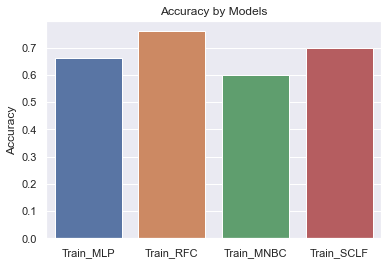

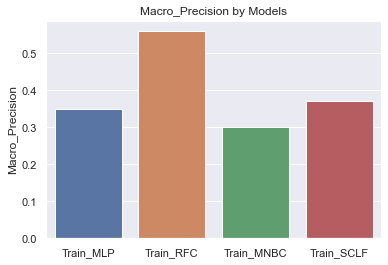

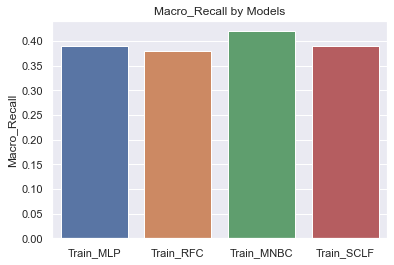

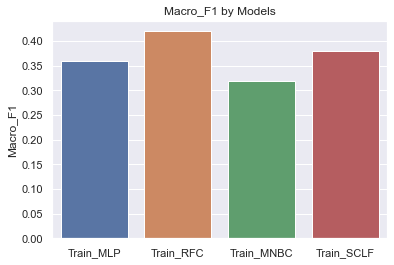

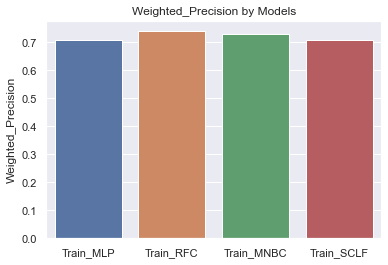

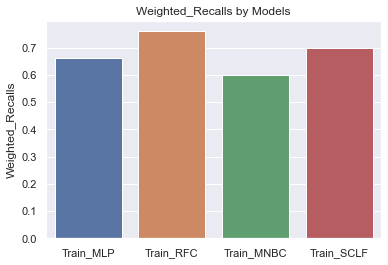

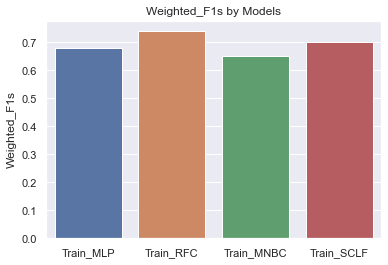

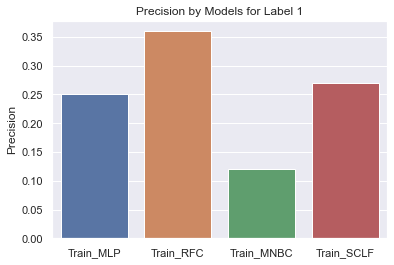

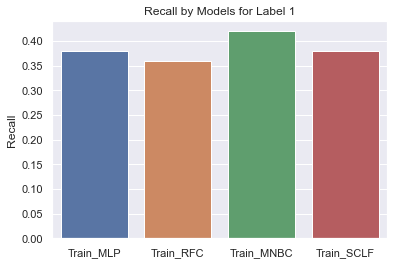

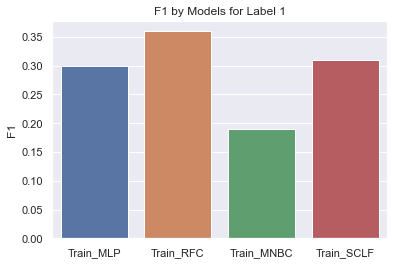

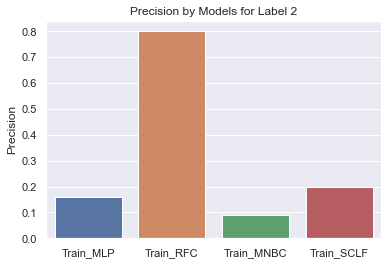

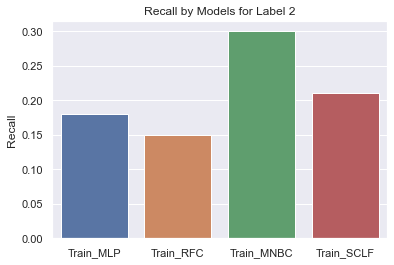

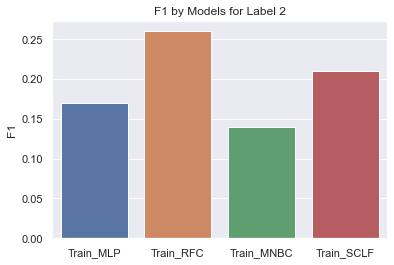

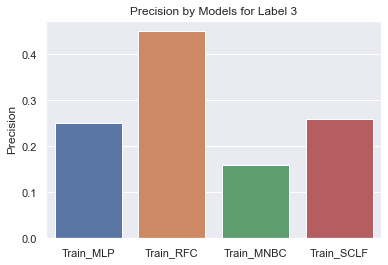

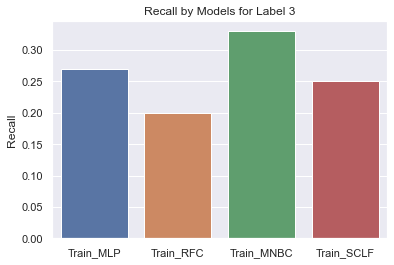

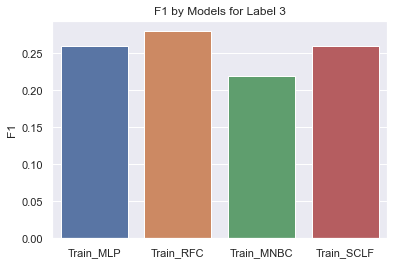

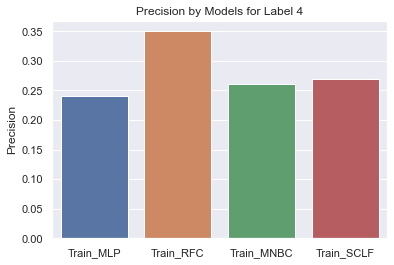

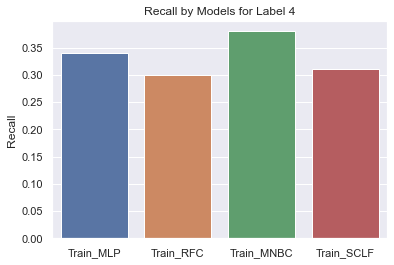

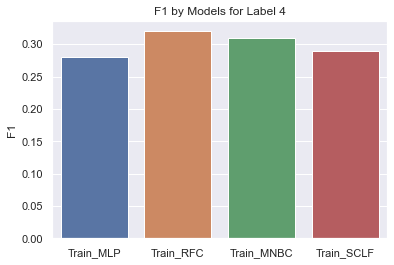

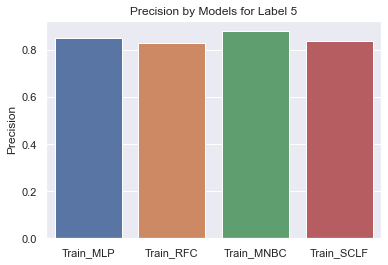

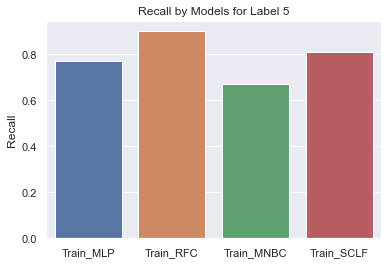

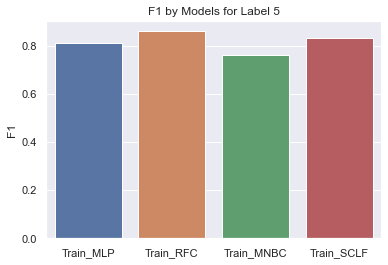

In [60]:
def plotter(df_list):
    for dataframeidx in range(len(df_list)):
        if dataframeidx == 0:
            for metric in df_list[dataframeidx].columns:
                sns.barplot(y=df_list[dataframeidx][str(metric)].astype('float'), x=df_list[0].index).set_title(str(metric) + ' by Models')
                plt.show()
        else: 
            for metric in df_list[dataframeidx].columns:
                sns.barplot(y=df_list[dataframeidx][str(metric)].astype('float'), x=df_list[0].index).set_title(str(metric) + ' by Models ' + 'for Label {}'.format(labels[dataframeidx-1]))
                plt.show()

plotter(classification_reports_train_df)

### Test Set Visual Evaluation

In [61]:
model_names =[]
labels= []
accuracies = []
precisions = []
recalls = []
f1s = []
macro_precisions = []
macro_recalls = []
macro_f1s = []
weighted_precisions = []
weighted_recalls = []
weighted_f1s = []

classification_report_to_df(classification_report(y_pred=mlp_test_predictions,  y_true= y_test.to_numpy().ravel()), 5, 'Test_MLP')
classification_report_to_df(classification_report(y_pred=rfc_test_predictions, y_true= y_test.to_numpy().ravel()), 5, 'Test_RFC')
classification_report_to_df(classification_report(y_pred=mnbc_test_predictions, y_true= y_test.to_numpy().ravel()), 5, 'Test_MNBC')
classification_reports_test_df = classification_report_to_df(classification_report(y_pred=stacked_test_predictions, y_true= y_test.to_numpy().ravel()), 5, 'Test_SCLF')

printer(classification_reports_test_df)

          Accuracy Macro_Precision Macro_Recall Macro_F1 Weighted_Precision  \
Test_MLP      0.72            0.36         0.37     0.35               0.70   
Test_RFC      0.75            0.53         0.37     0.40               0.73   
Test_MNBC     0.60            0.30         0.43     0.32               0.73   
Test_SCLF     0.71            0.37         0.38     0.37               0.71   

          Weighted_Recalls Weighted_F1s  
Test_MLP              0.72         0.71  
Test_RFC              0.75         0.74  
Test_MNBC             0.60         0.65  
Test_SCLF             0.71         0.71  
          Precision Recall    F1
Test_MLP       0.23   0.42  0.30
Test_RFC       0.31   0.32  0.32
Test_MNBC      0.13   0.46  0.21
Test_SCLF      0.26   0.39  0.31
          Precision Recall    F1
Test_MLP       0.20   0.13  0.16
Test_RFC       0.72   0.11  0.19
Test_MNBC      0.09   0.33  0.14
Test_SCLF      0.25   0.18  0.21
          Precision Recall    F1
Test_MLP       0.21   0.27  0.2

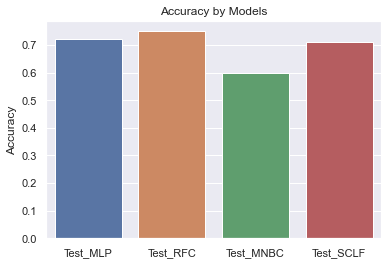

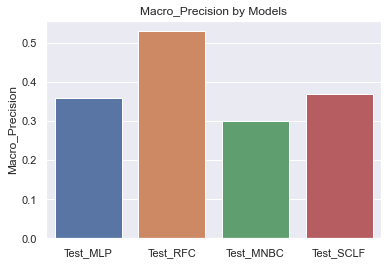

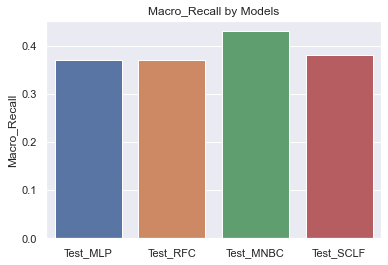

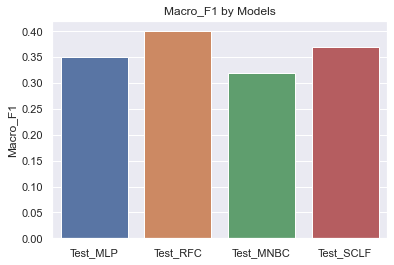

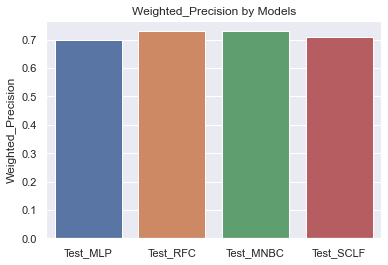

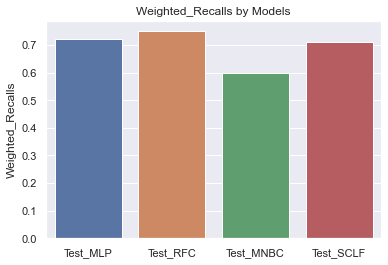

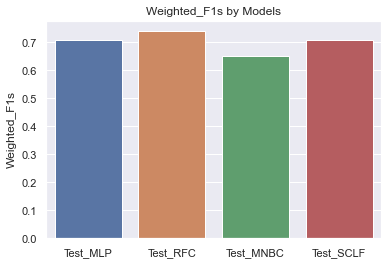

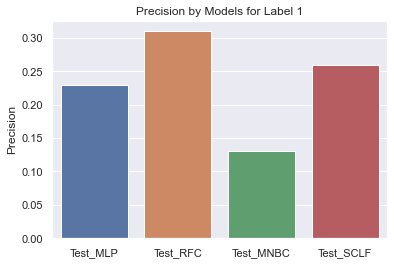

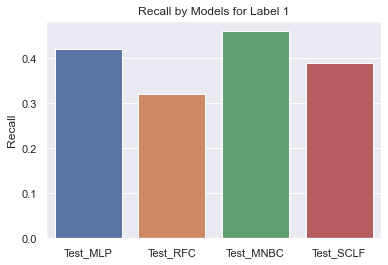

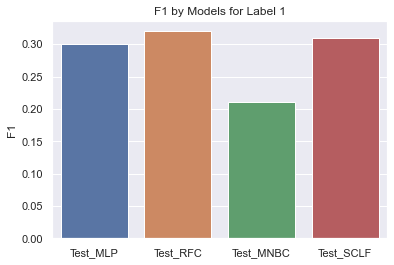

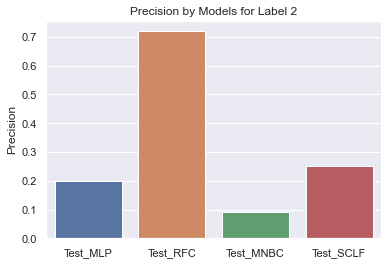

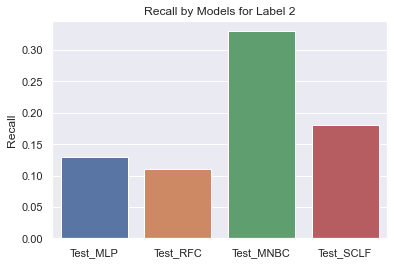

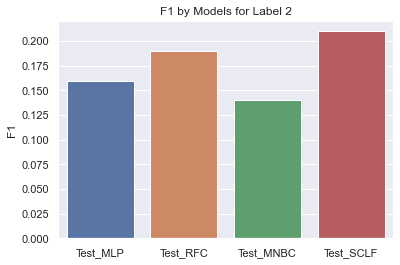

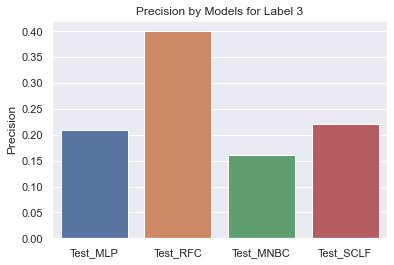

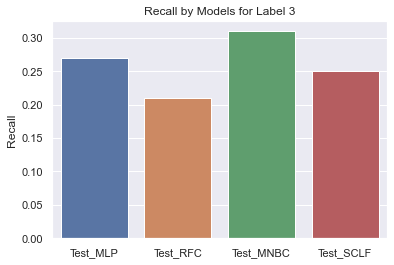

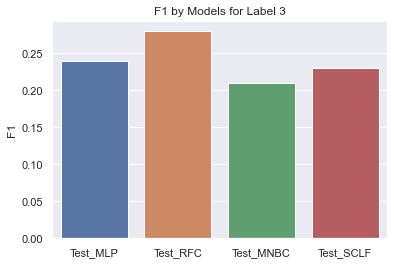

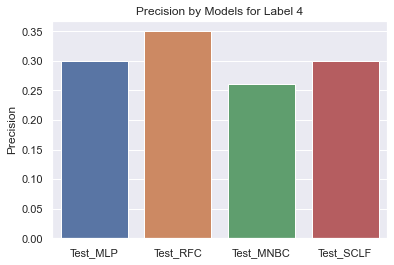

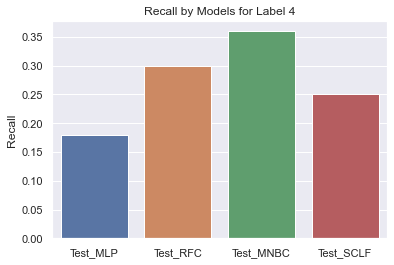

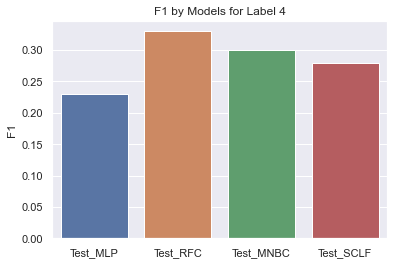

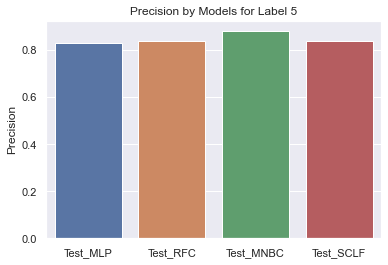

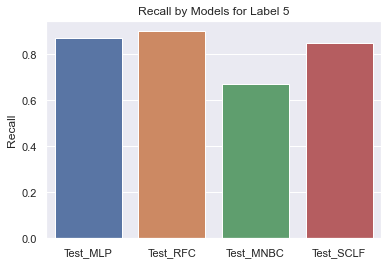

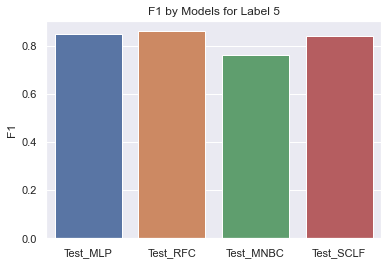

In [62]:
plotter(classification_reports_test_df)

Conclusion: The best performing model overall was the Random Forest Classifier, with the Stacked Logisitic Regression Model trailing behind and the Multinomial Naive Bayes Model performing the worse. In this case, the stacked model did not perform as well as the base models, this can be understood by the base models' better-than-weak results, which goes against the main purpose and use case of stacked models.

Future work: More EDA (i.e. matplotlib/seaborn/wordcloud), more advanced MLP techniques such as convolutions, recurrence, and Transformers, the last of which could also be used in the Feature Extraction part, more metrics(cohen's kappa, MCC, ROC) and boosting models like XGBoost or LightGBM.